# TFM

## Se importan las librerías necesarias





In [ ]:
# Se importan las librerías que sean necesarias
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec 
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Using Skicit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 
import time

#Librerias resampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline # Inorder to avoid testing model on sampled data

#modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier


# Importing the Keras libraries and packages
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense


from sklearn.neighbors import KNeighborsClassifier

from sklearn import preprocessing
from sklearn import svm

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import MultinomialNB #importamos el clasificador multinomial
from sklearn.naive_bayes import GaussianNB #importamos el clasificador gaussiano

#Importamos scikit-learn metrics module para obtener el accuracy
from sklearn import metrics
# importamos clasification report
from sklearn.metrics import classification_report
# importamos Area under the curve
from sklearn.metrics import auc

# Se importan las librerías necesarias
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler # para normalizar los datos
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


#Isolation Forest
from sklearn.ensemble import IsolationForest

from sklearn.svm import OneClassSVM

from sklearn.neighbors import LocalOutlierFactor

#Evaluación
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


## Datos

### Carga de los datos


In [ ]:

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link='https://drive.google.com/open?id=1mWfIKAL-P7gjxaFTePwC9B8izKq2u7wG'

In [ ]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1mWfIKAL-P7gjxaFTePwC9B8izKq2u7wG


In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('creditcard.csv')  
ds = pd.read_csv('creditcard.csv')
# Dataset is now stored in a Pandas Dataframe

In [ ]:
ds

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Análisis de datos

In [ ]:
a=ds.isna().any()#detectamos la presencia de missing values
a

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [ ]:
#Eliminamos el tiempo
ds['normalizedAmount'] = StandardScaler().fit_transform(ds['Amount'].values.reshape(-1,1))
ds= ds.drop(['Amount'],axis=1)
ds=ds.drop(['Time'],axis=1)


In [ ]:
ds.head() #se muestra la cabecera de los datos

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [ ]:
ds_stats=ds.describe() #se muestran las características básicas de los datos
ds_stats = ds_stats.transpose()
ds_stats


,count,mean,std,min,25%,50%,75%,max
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995
V10,284807.0,1.768627e-15,1.088850,-24.588262,-0.535426,-0.092917,0.453923,23.745136


In [ ]:
# Se dividen los diferentes datos en funcion de si son fraude o no
f = ds[ds['Class'] == 1] #la clase 1 corresponde a las transacciones fraudulentas
c = ds[ds['Class'] == 0] #la clase 0 corresponde a las transacciones correctas
outlierFraction = len(f)/float(len(c)) 
print(outlierFraction)
print('Transacciones fraudulentas: {}'.format(len(ds[ds['Class'] == 1]))) #se muestran las transacciones fraudulentas
print('Transacciones correctas: {}'.format(len(ds[ds['Class'] == 0]))) #se muestran las transacciones correctas


0.0017304750013189597
Transacciones fraudulentas: 492
Transacciones correctas: 284315


In [ ]:
data = {'Transacciones fraudulentas':  ['492'],
        'Transacciones correctas': ['284315']}

df = pd.DataFrame (data, columns = ['Transacciones fraudulentas','Transacciones correctas'])
df

,Transacciones fraudulentas,Transacciones correctas
0,492,284315


In [ ]:
# Transacciones fraudulentas en detalle, estadísticas básicas
print('Transacciones fraudulentas en detalle') 
f.normalizedAmount.describe() 

Transacciones fraudulentas en detalle


count    492.000000
mean       0.135382
std        1.026242
min       -0.353229
25%       -0.349231
50%       -0.316247
75%        0.070128
max        8.146182
Name: normalizedAmount, dtype: float64

In [ ]:
# Transacciones correctas en detalle
print('Transacciones correctas en detalle') 
c.normalizedAmount.describe() 

Transacciones correctas en detalle


count    284315.000000
mean         -0.000234
std           0.999942
min          -0.353229
25%          -0.330640
50%          -0.265271
75%          -0.045177
max         102.362243
Name: normalizedAmount, dtype: float64

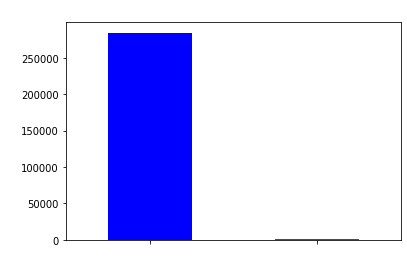

In [ ]:
count_classes = pd.value_counts(ds['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0, color=["b","r"])
plt.title("Representación transacciones", color='w')
plt.xticks(range(2), ["Transacciones correctas", "Transacciones fraudulentas"], color='w')
plt.xlabel("Tipo transacciones", color='w')
plt.ylabel("Nº transacciones", color='w');

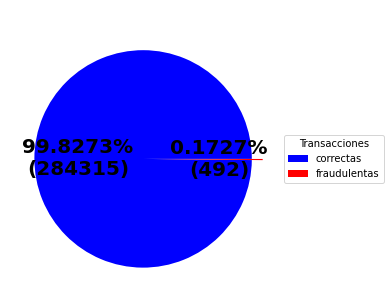

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))

recipe = ["284315 correctas",
          "492 fraudulentas"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.4f}%\n({:d})".format(pct, absolute)

explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), colors=["b","r"],explode=explode,
                                  textprops=dict(color="black"))




ax.legend(wedges, ingredients,
          title="Transacciones",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=20, weight="bold")

ax.set_title("Transacciones", color='w')

plt.show()

### División de los datos

In [ ]:
# división de los datos en las variables predictoras y la predicha
X = ds.drop(['Class'], axis = 1) 
Y = ds["Class"] 
print(X.shape) 
print(Y.shape) 
# getting just the values for the sake of processing  
# (its a numpy array with no columns) 
xData = X.values 
yData = Y.values 

(284807, 29)
(284807,)


In [ ]:
# Split the data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split( 
xData, yData, test_size = 0.2) 


In [ ]:
print(xTrain.shape) 
print(yTrain.shape) 
print(xTest.shape) 
print(yTest.shape) 


(227845, 29)
(227845,)
(56962, 29)
(56962,)


### Resampling


In [ ]:
# Define the resampling method
undersam = RandomUnderSampler(random_state=0)
oversam = RandomOverSampler(random_state=0)
smote = SMOTE(kind='regular',random_state=0)
#borderlinesmote = BorderlineSMOTE(kind='borderline-2',random_state=0)

# resample the training data
X_undersam, y_undersam = undersam.fit_sample(xTrain,yTrain)
X_oversam, y_oversam = oversam.fit_sample(xTrain,yTrain)
X_smote, y_smote = smote.fit_sample(xTrain,yTrain)
#X_borderlinesmote, y_borderlinesmote = borderlinesmote.fit_sample(xTrain,yTrain)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(X_undersam.shape) 
print(y_undersam.shape) 
print(X_oversam.shape) 
print(y_oversam.shape) 
print(X_smote.shape) 
print(y_smote.shape) 
print(xTrain.shape) 
print(yTrain.shape) 


(784, 29)
(784,)
(454906, 29)
(454906,)
(454906, 29)
(454906,)
(227845, 29)
(227845,)


In [ ]:
print(y_undersam.sum()) 
print(y_oversam.sum()) 
#print(y_smote.sum()) 
print(yTrain.sum())


392
227453
392


## Modelos Aprendizaje supervisado











### Oversampling


#### 1. Decision Tree OVER


In [ ]:
## Decison Tree
classifierDT_O = DecisionTreeClassifier(random_state = 0,
                                    criterion = 'gini',  splitter='best', min_samples_leaf=1, min_samples_split=2)
start_training_DT = time.time() #time
classifierDT_O.fit(X_oversam, y_oversam)
stop_training_DT = time.time() #time
train_time_DT=stop_training_DT - start_training_DT #time
print(f"Training time: {train_time_DT}s") #time

# Predicting Test Set
start_predicting_DT = time.time() #time
y_pred_DT_O = classifierDT_O.predict(xTest)
stop_predicting_DT = time.time() #time
pred_time_DT=stop_predicting_DT - start_predicting_DT #time
print(f"Prediction time: {pred_time_DT}s") #time
acc_DT_O = accuracy_score(yTest, y_pred_DT_O)
prec_DT_O = precision_score(yTest, y_pred_DT_O)
rec_DT_O = recall_score(yTest, y_pred_DT_O)
f1_DT_O = f1_score(yTest, y_pred_DT_O)


Training time: 17.85576844215393s
Prediction time: 0.007857322692871094s


In [ ]:
results_O = pd.DataFrame([['Decision tree (OS)', acc_DT_O, prec_DT_O, rec_DT_O, f1_DT_O]],
               columns = ['Model OverSampling', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_O

,Model OverSampling,Accuracy,Precision,Recall,F1 Score
0,Decision tree (OS),0.999192,0.787234,0.74,0.762887


ROC AUC Score: 0.8698241356266048


Número de puntos mal etiquetados de un total de 56962 puntos : 46


Métricas Decision tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.79      0.74      0.76       100

    accuracy                           1.00     56962
   macro avg       0.89      0.87      0.88     56962
weighted avg       1.00      1.00      1.00     56962



Matriz de confusión Decision tree:
 [[56842    20]
 [   26    74]]




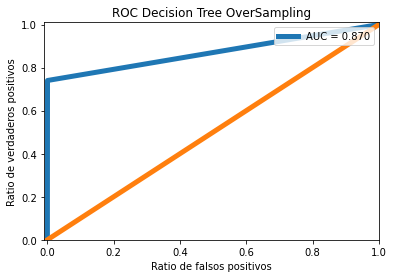

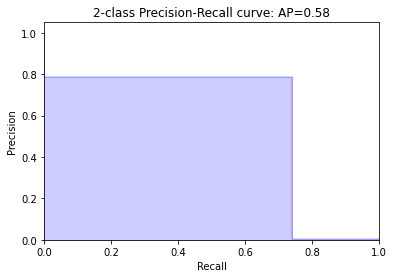

In [ ]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, y_pred_DT_O)

# Calculate Area Under the Receiver Operating Characteristic Curve 
roc_auc = roc_auc_score(yTest, y_pred_DT_O)
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(yTest, y_pred_DT_O)

# Calculate average precision 
average_precision = average_precision_score(yTest, y_pred_DT_O)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('ROC Decision Tree OverSampling', color='black')
    plt.ylabel('Ratio de verdaderos positivos', color='black')
    plt.xlabel('Ratio de falsos positivos', color='black')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix
print('\n')
print("Número de puntos mal etiquetados de un total de %d puntos : %d"
      % (xTest.shape[0], (yTest != y_pred_DT_O).sum()))
print('\n')
print('Métricas Decision tree:\n', classification_report(yTest, y_pred_DT_O))
print('\n')
print('Matriz de confusión Decision tree:\n',confusion_matrix(y_true = yTest, y_pred = y_pred_DT_O))
print('\n')

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)
print('\n')

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

#### 2. Random forest OVER

In [ ]:
## Randomforest
classifierRF_O = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')

start_training_RF = time.time() #time
classifierRF_O.fit(X_oversam, y_oversam)
stop_training_RF = time.time() #time
train_time_RF=stop_training_RF - start_training_RF #time
print(f"Training time: {train_time_RF}s") #time

# Predicting Test Set
start_predicting_RF = time.time() #time
y_pred_RF_O = classifierRF_O.predict(xTest)
stop_predicting_RF = time.time() #time
pred_time_RF=stop_predicting_RF - start_predicting_RF #time
print(f"Prediction time: {pred_time_RF}s") #time
acc_RF_O = accuracy_score(yTest, y_pred_RF_O)
prec_RF_O = precision_score(yTest, y_pred_RF_O)
rec_RF_O = recall_score(yTest, y_pred_RF_O)
f1_RF_O = f1_score(yTest, y_pred_RF_O)


Training time: 215.22820210456848s
Prediction time: 0.44575071334838867s


In [ ]:
model_results_RF_O = pd.DataFrame([['Random Forest (OS)', acc_RF_O, prec_RF_O, rec_RF_O, f1_RF_O]],
               columns = ['Model OverSampling', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_O = results_O.append(model_results_RF_O, ignore_index = True)
results_O

,Model OverSampling,Accuracy,Precision,Recall,F1 Score
0,Decision tree (OS),0.999192,0.787234,0.74,0.762887
1,Random Forest (OS),0.999508,0.950000,0.76,0.844444


ROC AUC Score: 0.879964827125321


Número de puntos mal etiquetados de un total de 56962 puntos : 28


Métricas Random forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.95      0.76      0.84       100

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



Matriz de confusión Random forest:
 [[56858     4]
 [   24    76]]




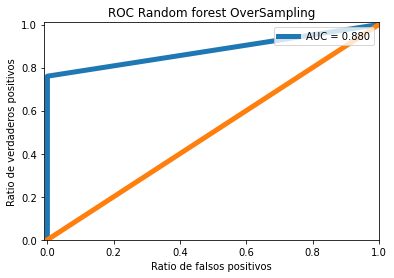

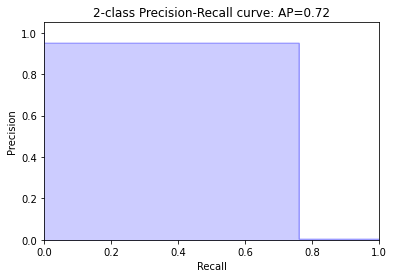

In [ ]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, y_pred_RF_O)

# Calculate Area Under the Receiver Operating Characteristic Curve 
roc_auc = roc_auc_score(yTest, y_pred_RF_O)
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(yTest, y_pred_RF_O)

# Calculate average precision 
average_precision = average_precision_score(yTest, y_pred_RF_O)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('ROC Random forest OverSampling', color='black')
    plt.ylabel('Ratio de verdaderos positivos', color='black')
    plt.xlabel('Ratio de falsos positivos', color='black')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix
print('\n')
print("Número de puntos mal etiquetados de un total de %d puntos : %d"
      % (xTest.shape[0], (yTest != y_pred_RF_O).sum()))
print('\n')
print('Métricas Random forest:\n', classification_report(yTest, y_pred_RF_O))
print('\n')
print('Matriz de confusión Random forest:\n',confusion_matrix(y_true = yTest, y_pred = y_pred_RF_O))
print('\n')

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)
print('\n')

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

#### 3. Red neuronal OVER

In [ ]:
'''# Initialising the ANN
classifierNN_O = Sequential()
# Adding the input layer and the first hidden layer
classifierNN_O.add(Dense(units =15 ,  activation = 'relu', input_dim = 29))
# Adding the second hidden layer
classifierNN_O.add(Dense(units = 15, activation = 'relu'))
# Adding the output layer
classifierNN_O.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the ANN
classifierNN_O.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set'''

classifierNN = Sequential()
classifierNN.add(Dense(64, activation="relu", input_dim=(xTrain.shape[1])))
classifierNN.add(Dense(16, activation="relu"))
classifierNN.add(Dense(16, activation="relu"))
classifierNN.add(Dense(1, activation="sigmoid"))
classifierNN.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])
classifierNN.summary()


my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=7,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)]

start_training_NN = time.time() #time
history=classifierNN_O.fit(X_oversam, y_oversam, batch_size = 32, epochs = 60, validation_split=0.2, callbacks=my_callbacks)
stop_training_NN = time.time() #time
train_time_NN=stop_training_NN - start_training_NN #time
print(f"Training time: {train_time_NN}s") #time



Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 64)                1920      
_________________________________________________________________
dense_59 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_60 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 17        
Total params: 3,249
Trainable params: 3,249
Non-trainable params: 0
_________________________________________________________________
Train on 363924 samples, validate on 90982 samples
Epoch 1/60
363924/363924 [==============================] - 16s 44us/step - loss: 7.3136e-04 - accuracy: 0.9999 - val_loss: 6.4893e-05 - val_accuracy: 1.0000
Epoch 2/60
363924/363924 [==============

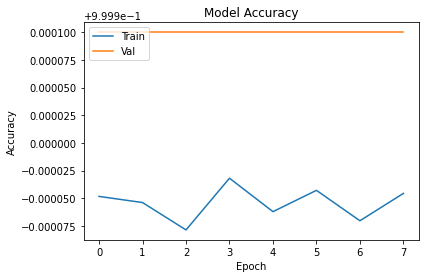

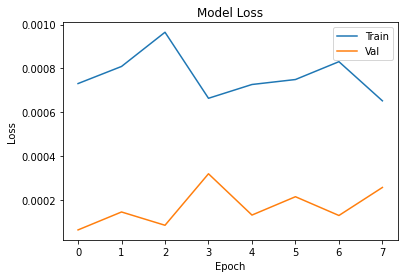

In [ ]:
plot_acc(history)
plot_loss(history)

In [ ]:

# Predicting Test Set
start_predicting_NN = time.time() #time
y_pred_NN_O = classifierNN_O.predict(xTest)
stop_predicting_NN = time.time() #time
pred_time_NN=stop_predicting_NN - start_predicting_NN #time
print(f"Prediction time: {pred_time_NN}s") #time





y_pred_NN_O = classifierNN_O.predict(xTest)
y_pred_NN_O =np.around(y_pred_NN_O)

accNN_O = accuracy_score(yTest, y_pred_NN_O)
precNN_O = precision_score(yTest, y_pred_NN_O)
recNN_O = recall_score(yTest, y_pred_NN_O)
f1NN_O = f1_score(yTest, y_pred_NN_O)

Prediction time: 0.8201630115509033s


In [ ]:
model_results_O = pd.DataFrame([['Red neuronal (OS)', accNN_O, precNN_O, recNN_O, f1NN_O]],
               columns = ['Model OverSampling', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_O = results_O.append(model_results_O, ignore_index = True)
results_O

,Model OverSampling,Accuracy,Precision,Recall,F1 Score
0,Decision tree (OS),0.999192,0.787234,0.74,0.762887
1,Random Forest (OS),0.999508,0.950000,0.76,0.844444
2,Red neuronal (OS),0.998824,0.625954,0.82,0.709957
3,KNN (OS),0.998964,0.675214,0.79,0.728111
4,LR (OS),0.977388,0.063877,0.87,0.119015
5,NB (OS),0.973561,0.053367,0.84,0.100358
6,Red neuronal (OS),0.998912,0.658333,0.79,0.718182
7,Red neuronal (OS),0.998947,0.669492,0.79,0.724771
8,Red neuronal (OS),0.998876,0.647541,0.79,0.711712
9,Red neuronal (OS),0.999140,0.742857,0.78,0.760976


ROC AUC Score: 0.8847889627519258


Número de puntos mal etiquetados de un total de 56962 puntos : 11429162


Métricas Red neuronal:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.76      0.77      0.77       100

    accuracy                           1.00     56962
   macro avg       0.88      0.88      0.88     56962
weighted avg       1.00      1.00      1.00     56962



Matriz de confusión Red neuronal:
 [[56838    24]
 [   23    77]]




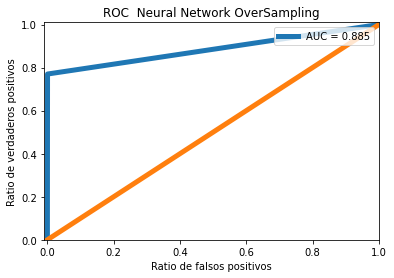

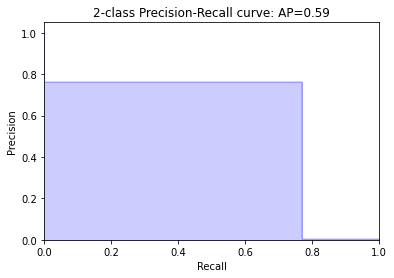

In [ ]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, y_pred_NN_O)

# Calculate Area Under the Receiver Operating Characteristic Curve 
roc_auc = roc_auc_score(yTest, y_pred_NN_O)
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(yTest, y_pred_NN_O)

# Calculate average precision 
average_precision = average_precision_score(yTest, y_pred_NN_O)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('ROC  Neural Network OverSampling', color='k')
    plt.ylabel('Ratio de verdaderos positivos', color='k')
    plt.xlabel('Ratio de falsos positivos', color='k')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix
print('\n')
print("Número de puntos mal etiquetados de un total de %d puntos : %d"
      % (xTest.shape[0], (yTest != y_pred_NN_O).sum()))

print('\n')
print('Métricas Red neuronal:\n', classification_report(yTest, y_pred_NN_O))
print('\n')
print('Matriz de confusión Red neuronal:\n',confusion_matrix(y_true = yTest, y_pred = y_pred_NN_O))
print('\n')

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)
print('\n')

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

#### 4. SVM OVER

In [ ]:
'''classifier_SVM_O = svm.SVC(kernel='linear') 
classifier_SVM_O.fit(X_oversam, y_oversam)'''

"classifier_SVM_O = svm.SVC(kernel='linear') \nclassifier_SVM_O.fit(X_oversam, y_oversam)"

In [ ]:
'''# Predicting Test Set
y_pred_SVM_O = classifier_SVM.predict(xTest)
acc_SVM_O = accuracy_score(yTest, y_pred_SVM_O)
prec_SVM_O = precision_score(yTest, y_pred_SVM_O)
rec_SVM_O = recall_score(yTest, y_pred_SVM_O)
f1_SVM_O = f1_score(yTest, y_pred_SVM_O)
'''

'# Predicting Test Set\ny_pred_SVM_O = classifier_SVM.predict(xTest)\nacc_SVM_O = accuracy_score(yTest, y_pred_SVM_O)\nprec_SVM_O = precision_score(yTest, y_pred_SVM_O)\nrec_SVM_O = recall_score(yTest, y_pred_SVM_O)\nf1_SVM_O = f1_score(yTest, y_pred_SVM_O)\n'

In [ ]:
'''model_results_SVM_O = pd.DataFrame([['SVM (OS) ', acc_SVM_O, prec_SVM_O, rec_SVM_O, f1_SVM_O]],
               columns = ['Model OverSampling', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_O = results_O.append(model_results_KNN_O, ignore_index = True)

results_O'''

"model_results_SVM_O = pd.DataFrame([['SVM (OS) ', acc_SVM_O, prec_SVM_O, rec_SVM_O, f1_SVM_O]],\n               columns = ['Model OverSampling', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])\nresults_O = results_O.append(model_results_KNN_O, ignore_index = True)\n\nresults_O"

#### 5. KNN OVER

In [ ]:
classifier_KNN_O = KNeighborsClassifier(n_neighbors=5)
classifier_KNN_O.fit(X_oversam, y_oversam)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Predicting Test Set
y_pred_KNN_O = classifier_KNN_O.predict(xTest)
acc_KNN_O = accuracy_score(yTest, y_pred_KNN_O)
prec_KNN_O = precision_score(yTest, y_pred_KNN_O)
rec_KNN_O = recall_score(yTest, y_pred_KNN_O)
f1_KNN_O = f1_score(yTest, y_pred_KNN_O)


In [ ]:
model_results_KNN_O = pd.DataFrame([['KNN (OS)', acc_KNN_O, prec_KNN_O, rec_KNN_O, f1_KNN_O]],
               columns = ['Model OverSampling', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_O = results_O.append(model_results_KNN_O, ignore_index = True)

results_O

,Model OverSampling,Accuracy,Precision,Recall,F1 Score
0,Decision tree (OS),0.999192,0.787234,0.74,0.762887
1,Random Forest (OS),0.999508,0.950000,0.76,0.844444
2,Red neuronal (OS),0.998824,0.625954,0.82,0.709957
3,KNN (OS),0.998964,0.675214,0.79,0.728111
4,LR (OS),0.977388,0.063877,0.87,0.119015
5,NB (OS),0.973561,0.053367,0.84,0.100358
6,Red neuronal (OS),0.998912,0.658333,0.79,0.718182
7,Red neuronal (OS),0.998947,0.669492,0.79,0.724771
8,Red neuronal (OS),0.998876,0.647541,0.79,0.711712
9,Red neuronal (OS),0.999140,0.742857,0.78,0.760976


ROC AUC Score: 0.8897274102212375


Número de puntos mal etiquetados de un total de 56962 puntos : 53


Métricas KNN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.72      0.78      0.75       100

    accuracy                           1.00     56962
   macro avg       0.86      0.89      0.87     56962
weighted avg       1.00      1.00      1.00     56962



Matriz de confusión KNN:
 [[56831    31]
 [   22    78]]




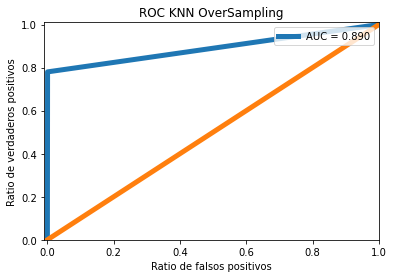

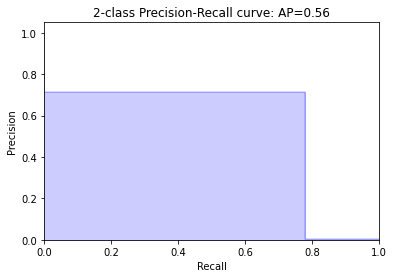

In [ ]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, y_pred_KNN_O)

# Calculate Area Under the Receiver Operating Characteristic Curve 
roc_auc = roc_auc_score(yTest, y_pred_KNN_O)
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(yTest, y_pred_KNN_O)

# Calculate average precision 
average_precision = average_precision_score(yTest, y_pred_KNN_O)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('ROC KNN OverSampling', color='k')
    plt.ylabel('Ratio de verdaderos positivos', color='k')
    plt.xlabel('Ratio de falsos positivos', color='k')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix
print('\n')
print("Número de puntos mal etiquetados de un total de %d puntos : %d"
      % (xTest.shape[0], (yTest != y_pred_KNN_O).sum()))

print('\n')
print('Métricas KNN:\n', classification_report(yTest, y_pred_KNN_O))
print('\n')
print('Matriz de confusión KNN:\n',confusion_matrix(y_true = yTest, y_pred = y_pred_KNN_O))
print('\n')

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)
print('\n')

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

#### 6. REGRESIÓN LOGÍSTICA OVER

In [ ]:
classifier_LR_O = LogisticRegression(random_state=0)
classifier_LR_O.fit(X_oversam, y_oversam)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_LR_O = classifier_LR_O.predict(xTest)
acc_LR_O = accuracy_score(yTest, y_pred_LR_O)
prec_LR_O = precision_score(yTest, y_pred_LR_O)
rec_LR_O = recall_score(yTest, y_pred_LR_O)
f1_LR_O = f1_score(yTest, y_pred_LR_O)

In [ ]:
model_results_LR_O = pd.DataFrame([['LR (OS) ', acc_LR_O, prec_LR_O, rec_LR_O, f1_LR_O]],
               columns = ['Model OverSampling', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_O = results_O.append(model_results_LR_O, ignore_index = True)

results_O

,Model OverSampling,Accuracy,Precision,Recall,F1 Score
0,Decision tree (OS),0.999192,0.787234,0.74,0.762887
1,Random Forest (OS),0.999508,0.950000,0.76,0.844444
2,Red neuronal (OS),0.998824,0.625954,0.82,0.709957
3,KNN (OS),0.998964,0.675214,0.79,0.728111
4,LR (OS),0.977388,0.063877,0.87,0.119015


ROC AUC Score: 0.9237886461960537


Número de puntos mal etiquetados de un total de 56962 puntos : 1288


Métricas LR OverSampling:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56862
           1       0.06      0.87      0.12       100

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.55     56962
weighted avg       1.00      0.98      0.99     56962



Matriz de confusión LR:
 [[55587  1275]
 [   13    87]]




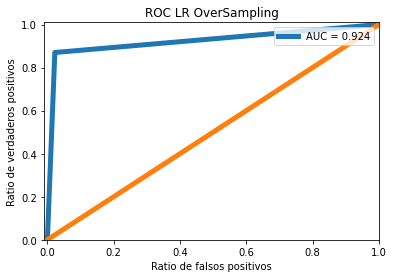

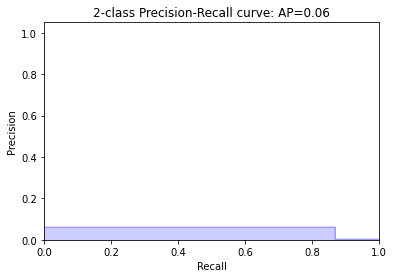

In [ ]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, y_pred_LR_O)

# Calculate Area Under the Receiver Operating Characteristic Curve 
roc_auc = roc_auc_score(yTest, y_pred_LR_O)
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(yTest, y_pred_LR_O)

# Calculate average precision 
average_precision = average_precision_score(yTest, y_pred_LR_O)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('ROC LR OverSampling', color='k')
    plt.ylabel('Ratio de verdaderos positivos', color='k')
    plt.xlabel('Ratio de falsos positivos', color='k')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix
print('\n')
print("Número de puntos mal etiquetados de un total de %d puntos : %d"
      % (xTest.shape[0], (yTest != y_pred_LR_O).sum()))

print('\n')
print('Métricas LR OverSampling:\n', classification_report(yTest, y_pred_LR_O))
print('\n')
print('Matriz de confusión LR:\n',confusion_matrix(y_true = yTest, y_pred = y_pred_LR_O))
print('\n')

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)
print('\n')

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

#### 7. NAIVE BAYES OVER

In [ ]:

#se genera el modelo, se entrena y se predice
classifier_NB_O = GaussianNB()
classifier_NB_O.fit(X_oversam, y_oversam)
y_pred_NB_O = classifier_NB_O.predict(xTest)

# Se obtienen las metricas correspndientes
#accuracy
print("Accuracy: %.4f"%metrics.accuracy_score(yTest, y_pred_NB_O))

#errores
print("Número de puntos mal etiquetados de un total de %d puntos : %d"
      % (xTest.shape[0], (yTest != y_pred_NB_O).sum()))

#matriz de confusión
resultados_O = confusion_matrix(yTest, y_pred_NB_O)
print("Matriz de confusión:\n",resultados_O)

#classification report
clfrep_O=classification_report(yTest, y_pred_NB_O)
print(clfrep_O)

#area under the curve
fpr_O, tpr_O, thresholds_O = metrics.roc_curve(yTest, y_pred_NB_O)
auc_O=metrics.auc(fpr_O, tpr_O)
print("El resultado del AUC es: %.4f"% auc_O)


Accuracy: 0.9736
Número de puntos mal etiquetados de un total de 56962 puntos : 1506
Matriz de confusión:
 [[55372  1490]
 [   16    84]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56862
           1       0.05      0.84      0.10       100

    accuracy                           0.97     56962
   macro avg       0.53      0.91      0.54     56962
weighted avg       1.00      0.97      0.99     56962

El resultado del AUC es: 0.9069


In [ ]:
y_pred_NB_O = classifier_NB_O.predict(xTest)
acc_NB_O = accuracy_score(yTest, y_pred_NB_O)
prec_NB_O = precision_score(yTest, y_pred_NB_O)
rec_NB_O = recall_score(yTest, y_pred_NB_O)
f1_NB_O = f1_score(yTest, y_pred_NB_O)

In [ ]:
model_results_NB_O = pd.DataFrame([['NB (OS) ', acc_NB_O, prec_NB_O, rec_NB_O, f1_NB_O]],
               columns = ['Model OverSampling', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_O = results_O.append(model_results_NB_O, ignore_index = True)
results_O

,Model OverSampling,Accuracy,Precision,Recall,F1 Score
0,Decision tree (OS),0.999192,0.787234,0.74,0.762887
1,Random Forest (OS),0.999508,0.950000,0.76,0.844444
2,Red neuronal (OS),0.998824,0.625954,0.82,0.709957
3,KNN (OS),0.998964,0.675214,0.79,0.728111
4,LR (OS),0.977388,0.063877,0.87,0.119015
5,NB (OS),0.973561,0.053367,0.84,0.100358


ROC AUC Score: 0.9068981041820547


Métricas NB:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56862
           1       0.05      0.84      0.10       100

    accuracy                           0.97     56962
   macro avg       0.53      0.91      0.54     56962
weighted avg       1.00      0.97      0.99     56962



Matriz de confusión NB:
 [[55372  1490]
 [   16    84]]




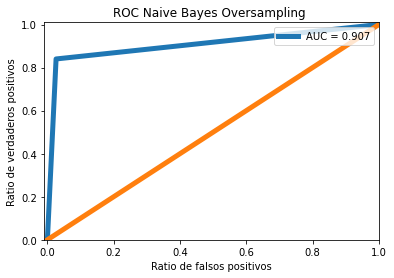

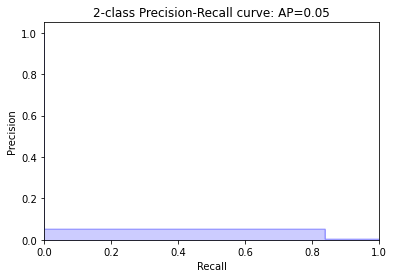

In [ ]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, y_pred_NB_O)

# Calculate Area Under the Receiver Operating Characteristic Curve 
roc_auc = roc_auc_score(yTest, y_pred_NB_O)
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(yTest, y_pred_NB_O)

# Calculate average precision 
average_precision = average_precision_score(yTest, y_pred_NB_O)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('ROC Naive Bayes Oversampling ', color='k')
    plt.ylabel('Ratio de verdaderos positivos', color='k')
    plt.xlabel('Ratio de falsos positivos', color='k')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix
print('\n')
print('Métricas NB:\n', classification_report(yTest, y_pred_NB_O))
print('\n')
print('Matriz de confusión NB:\n',confusion_matrix(y_true = yTest, y_pred = y_pred_NB_O))
print('\n')

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)
print('\n')

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

### Resultados OverSampling

In [ ]:
results_O

,Model OverSampling,Accuracy,Precision,Recall,F1 Score
0,Decision tree (OS),0.999192,0.787234,0.74,0.762887
1,Random Forest (OS),0.999508,0.950000,0.76,0.844444
2,Red neuronal (OS),0.998824,0.625954,0.82,0.709957
3,KNN (OS),0.998964,0.675214,0.79,0.728111
4,LR (OS),0.977388,0.063877,0.87,0.119015
5,NB (OS),0.973561,0.053367,0.84,0.100358


### Undersampling

#### 1. Decision Tree UNDER


In [ ]:
## Decison Tree
classifierDT = DecisionTreeClassifier(random_state = 0,
                                    criterion = 'gini',  splitter='best', min_samples_leaf=1, min_samples_split=2)
classifierDT.fit(X_undersam, y_undersam)
# Predicting Test Set
y_pred_DT_U = classifierDT.predict(xTest)
acc_DT_U = accuracy_score(yTest, y_pred_DT_U)
prec_DT_U = precision_score(yTest, y_pred_DT_U)
rec_DT_U = recall_score(yTest, y_pred_DT_U)
f1_DT_U = f1_score(yTest, y_pred_DT_U)



In [ ]:
results_U = pd.DataFrame([['Decision tree (US)', acc_DT_U, prec_DT_U, rec_DT_U, f1_DT_U]],
               columns = ['Model UnderSampling', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_U

,Model UnderSampling,Accuracy,Precision,Recall,F1 Score
0,Decision tree (US),0.894684,0.014486,0.88,0.028502


ROC AUC Score: 0.8873549998241356


Número de puntos mal etiquetados de un total de 56962 puntos : 5999


Métricas:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94     56862
           1       0.01      0.88      0.03       100

    accuracy                           0.89     56962
   macro avg       0.51      0.89      0.49     56962
weighted avg       1.00      0.89      0.94     56962



Matriz de confusión :
 [[50875  5987]
 [   12    88]]




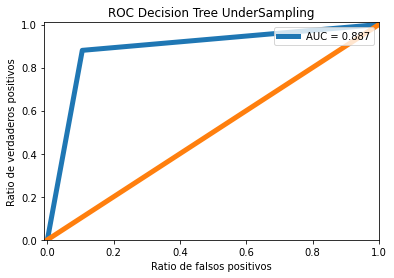

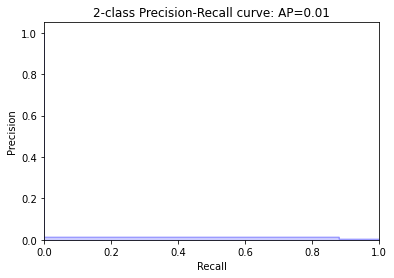

In [ ]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, y_pred_DT_U)

# Calculate Area Under the Receiver Operating Characteristic Curve 
roc_auc = roc_auc_score(yTest, y_pred_DT_U)
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(yTest, y_pred_DT_U)

# Calculate average precision 
average_precision = average_precision_score(yTest, y_pred_DT_U)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('ROC Decision Tree UnderSampling', color='k')
    plt.ylabel('Ratio de verdaderos positivos', color='k')
    plt.xlabel('Ratio de falsos positivos', color='k')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix
print('\n')
print("Número de puntos mal etiquetados de un total de %d puntos : %d"
      % (xTest.shape[0], (yTest != y_pred_DT_U).sum()))
print('\n')
print('Métricas:\n', classification_report(yTest, y_pred_DT_U))
print('\n')
print('Matriz de confusión :\n',confusion_matrix(y_true = yTest, y_pred = y_pred_DT_U))
print('\n')

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)
print('\n')

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

#### 2. Random forest UNDER

In [ ]:
## Randomforest

classifierRF_U = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifierRF_U.fit(X_undersam, y_undersam)
# Predicting Test Set
y_pred_RF_U = classifierRF_U.predict(xTest)
acc_RF_U = accuracy_score(yTest, y_pred_RF_U)
prec_RF_U = precision_score(yTest, y_pred_RF_U)
rec_RF_U = recall_score(yTest, y_pred_RF_U)
f1_RF_U = f1_score(yTest, y_pred_RF_U)


In [ ]:
model_results_RF_U = pd.DataFrame([['Random Forest (US) (n=100)', acc_RF_U, prec_RF_U, rec_RF_U, f1_RF_U]],
               columns = ['Model UnderSampling', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_U = results_U.append(model_results_RF_U, ignore_index = True)
results_U

,Model UnderSampling,Accuracy,Precision,Recall,F1 Score
0,Decision tree (US),0.894684,0.014486,0.88,0.028502
1,Random Forest (US) (n=100),0.977371,0.063830,0.87,0.118934


ROC AUC Score: 0.923779852977384


Número de puntos mal etiquetados de un total de 56962 puntos : 1289


Métricas Random forest:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56862
           1       0.06      0.87      0.12       100

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.55     56962
weighted avg       1.00      0.98      0.99     56962



Matriz de confusión Random forest:
 [[55586  1276]
 [   13    87]]




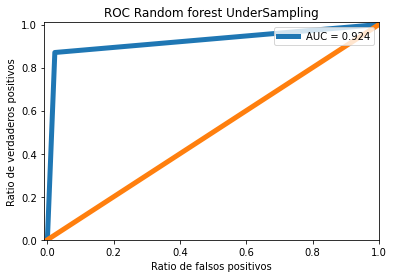

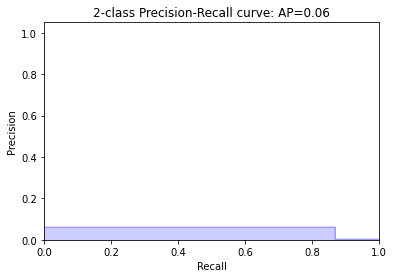

In [ ]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, y_pred_RF_U)

# Calculate Area Under the Receiver Operating Characteristic Curve 
roc_auc = roc_auc_score(yTest, y_pred_RF_U)
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(yTest, y_pred_RF_U)

# Calculate average precision 
average_precision = average_precision_score(yTest, y_pred_RF_U)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('ROC Random forest UnderSampling', color='black')
    plt.ylabel('Ratio de verdaderos positivos', color='black')
    plt.xlabel('Ratio de falsos positivos', color='black')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix
print('\n')
print("Número de puntos mal etiquetados de un total de %d puntos : %d"
      % (xTest.shape[0], (yTest != y_pred_RF_U).sum()))
print('\n')
print('Métricas Random forest:\n', classification_report(yTest, y_pred_RF_U))
print('\n')
print('Matriz de confusión Random forest:\n',confusion_matrix(y_true = yTest, y_pred = y_pred_RF_U))
print('\n')

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)
print('\n')

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

#### 3. Red neuronal UNDER

In [ ]:
classifierNN = Sequential()
classifierNN.add(Dense(64, activation="relu", input_dim=(xTrain.shape[1])))
classifierNN.add(Dense(16, activation="relu"))
classifierNN.add(Dense(16, activation="relu"))
classifierNN.add(Dense(1, activation="sigmoid"))
classifierNN.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])
classifierNN.summary()

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=7,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)]
classifierNN_U.fit(X_undersam, y_undersam, batch_size = 32, epochs = 60, validation_split=0.2, callbacks=my_callbacks)


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 64)                1920      
_________________________________________________________________
dense_63 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_64 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 17        
Total params: 3,249
Trainable params: 3,249
Non-trainable params: 0
_________________________________________________________________
Train on 627 samples, validate on 157 samples
Epoch 1/60
627/627 [==============================] - 0s 49us/step - loss: 0.2139 - accuracy: 0.9522 - val_loss: 0.2710 - val_accuracy: 0.8662
Epoch 2/60
627/627 [==============================] - 0s 48u

In [ ]:
y_pred_NN_U = classifierNN_U.predict(xTest)
y_pred_NN_U=np.around(y_pred_NN_U)
accNN_U = accuracy_score(yTest, y_pred_NN_U)
precNN_U = precision_score(yTest, y_pred_NN_U)
recNN_U = recall_score(yTest, y_pred_NN_U)
f1NN_U = f1_score(yTest, y_pred_NN_U)

In [ ]:
model_results_U = pd.DataFrame([['Red neuronal (US)', accNN_U, precNN_U, recNN_U, f1NN_U]],
               columns = ['Model UnderSampling', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_U = results_U.append(model_results_U, ignore_index = True)
results_U

,Model UnderSampling,Accuracy,Precision,Recall,F1 Score
0,Decision tree (US),0.894684,0.014486,0.88,0.028502
1,Random Forest (US) (n=100),0.977371,0.063830,0.87,0.118934
2,Red neuronal (US),0.976581,0.058655,0.82,0.109479


In [ ]:
y_pred_NN_U = classifierNN_U.predict(xTest)
y_pred_NN_U = (y_pred_NN_U > 0.5)
score_U = classifierNN_U.evaluate(xTest, yTest)
score_U

56962/56962 [==============================] - 1s 25us/step


[0.10876909452104815, 0.9799339771270752]

ROC AUC Score: 0.9050988357778482


Número de puntos mal etiquetados de un total de 56962 puntos : 74321458


Métricas Red neuronal:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56862
           1       0.07      0.83      0.13       100

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.56     56962
weighted avg       1.00      0.98      0.99     56962



Matriz de confusión Red neuronal:
 [[55736  1126]
 [   17    83]]




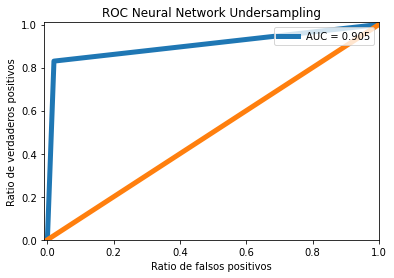

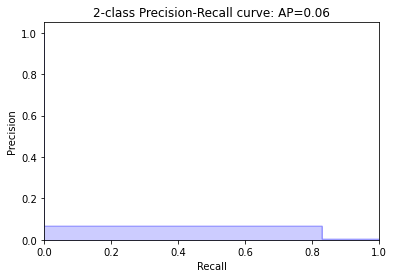

In [ ]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, y_pred_NN_U)

# Calculate Area Under the Receiver Operating Characteristic Curve 
roc_auc = roc_auc_score(yTest, y_pred_NN_U)
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(yTest, y_pred_NN_U)

# Calculate average precision 
average_precision = average_precision_score(yTest, y_pred_NN_U)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('ROC Neural Network Undersampling', color='k')
    plt.ylabel('Ratio de verdaderos positivos', color='k')
    plt.xlabel('Ratio de falsos positivos', color='k')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix
print('\n')
print("Número de puntos mal etiquetados de un total de %d puntos : %d"
      % (xTest.shape[0], (yTest != y_pred_NN_U).sum()))

print('\n')
print('Métricas Red neuronal:\n', classification_report(yTest, y_pred_NN_U))
print('\n')
print('Matriz de confusión Red neuronal:\n',confusion_matrix(y_true = yTest, y_pred = y_pred_NN_U))
print('\n')

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)
print('\n')

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

#### 4. SVM UNDER

In [ ]:
classifier_SVM_U = svm.SVC(kernel='rbf') 


start_training_SVM = time.time() #time
classifier_SVM_U.fit(X_undersam, y_undersam)
stop_training_SVM = time.time() #time
train_time_SVM=stop_training_SVM - start_training_SVM #time
print(f"Training time: {train_time_SVM}s") #time



Training time: 0.012583017349243164s


In [ ]:

# Predicting Test Set
start_predicting_SVM = time.time() #time
y_pred_SVM_U = classifier_SVM_U.predict(xTest)
stop_predicting_SVM = time.time() #time
pred_time_SVM=stop_predicting_SVM - start_predicting_SVM #time
print(f"Prediction time: {pred_time_SVM}s") #time

acc_SVM_U = accuracy_score(yTest, y_pred_SVM_U)
prec_SVM_U = precision_score(yTest, y_pred_SVM_U)
rec_SVM_U = recall_score(yTest, y_pred_SVM_U)
f1_SVM_U = f1_score(yTest, y_pred_SVM_U)


Prediction time: 0.560544490814209s


In [ ]:


model_results_SVM_U = pd.DataFrame([['SVM (US) ', acc_SVM_U, prec_SVM_U, rec_SVM_U, f1_SVM_U]],
               columns = ['Model UnderSampling', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results_SVM_U

,Model UnderSampling,Accuracy,Precision,Recall,F1 Score
0,SVM (US),0.981409,0.075288,0.85,0.138324


ROC AUC Score: 0.9158198797087687


Número de puntos mal etiquetados de un total de 56962 puntos : 1059


Métricas:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56862
           1       0.08      0.85      0.14       100

    accuracy                           0.98     56962
   macro avg       0.54      0.92      0.56     56962
weighted avg       1.00      0.98      0.99     56962



Matriz de confusión :
 [[55818  1044]
 [   15    85]]




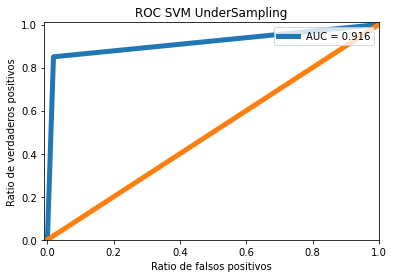

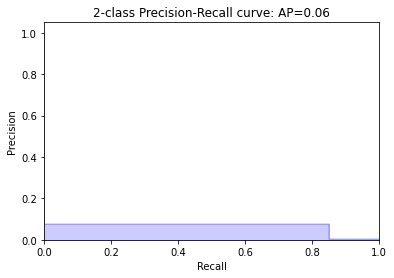

In [ ]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, y_pred_SVM_U)

# Calculate Area Under the Receiver Operating Characteristic Curve 
roc_auc = roc_auc_score(yTest, y_pred_SVM_U)
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(yTest, y_pred_SVM_U)

# Calculate average precision 
average_precision = average_precision_score(yTest, y_pred_SVM_U)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('ROC SVM UnderSampling', color='black')
    plt.ylabel('Ratio de verdaderos positivos', color='black')
    plt.xlabel('Ratio de falsos positivos', color='black')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix
print('\n')
print("Número de puntos mal etiquetados de un total de %d puntos : %d"
      % (xTest.shape[0], (yTest != y_pred_SVM_U).sum()))
print('\n')
print('Métricas:\n', classification_report(yTest, y_pred_SVM_U))
print('\n')
print('Matriz de confusión :\n',confusion_matrix(y_true = yTest, y_pred = y_pred_SVM_U))
print('\n')

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)
print('\n')

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

#### 5. KNN UNDER

In [ ]:
classifier_KNN_U = KNeighborsClassifier(n_neighbors=5)
classifier_KNN_U.fit(X_undersam, y_undersam)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Predicting Test Set
y_pred_KNN_U = classifier_KNN_U.predict(xTest)
acc_KNN_U = accuracy_score(yTest, y_pred_KNN_U)
prec_KNN_U = precision_score(yTest, y_pred_KNN_U)
rec_KNN_U = recall_score(yTest, y_pred_KNN_U)
f1_KNN_U = f1_score(yTest, y_pred_KNN_U)


In [ ]:
model_results_KNN_U = pd.DataFrame([['KNN (US) ', acc_KNN_U, prec_KNN_U, rec_KNN_U, f1_KNN_U]],
               columns = ['Model UnderSampling', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_U = results_U.append(model_results_KNN_U, ignore_index = True)

results_U

,Model UnderSampling,Accuracy,Precision,Recall,F1 Score
0,Decision tree (US),0.894684,0.014486,0.88,0.028502
1,Random Forest (US) (n=100),0.977371,0.063830,0.87,0.118934
2,Red neuronal (US),0.976581,0.058655,0.82,0.109479
3,KNN (US),0.974896,0.058433,0.88,0.109589


ROC AUC Score: 0.9275312159262775


Número de puntos mal etiquetados de un total de 56962 puntos : 1430


Métricas Red neuronal:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56862
           1       0.06      0.88      0.11       100

    accuracy                           0.97     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.97      0.99     56962



Matriz de confusión Red neuronal:
 [[55444  1418]
 [   12    88]]




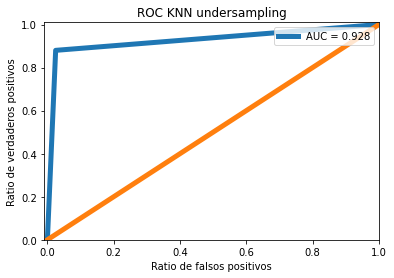

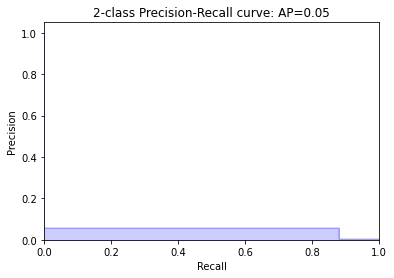

In [ ]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, y_pred_KNN_U)

# Calculate Area Under the Receiver Operating Characteristic Curve 
roc_auc = roc_auc_score(yTest, y_pred_KNN_U)
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(yTest, y_pred_KNN_U)

# Calculate average precision 
average_precision = average_precision_score(yTest, y_pred_KNN_U)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('ROC KNN undersampling', color='k')
    plt.ylabel('Ratio de verdaderos positivos', color='k')
    plt.xlabel('Ratio de falsos positivos', color='k')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix
print('\n')
print("Número de puntos mal etiquetados de un total de %d puntos : %d"
      % (xTest.shape[0], (yTest != y_pred_KNN_U).sum()))

print('\n')
print('Métricas Red neuronal:\n', classification_report(yTest, y_pred_KNN_U))
print('\n')
print('Matriz de confusión Red neuronal:\n',confusion_matrix(y_true = yTest, y_pred = y_pred_KNN_U))
print('\n')

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)
print('\n')

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

#### 6. REGRESIÓN LOGÍSTICA UNDER

In [ ]:
classifier_LR_U = LogisticRegression(random_state=0)
classifier_LR_U.fit(X_undersam, y_undersam)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_LR_U = classifier_LR_U.predict(xTest)
acc_LR_U = accuracy_score(yTest, y_pred_LR_U)
prec_LR_U = precision_score(yTest, y_pred_LR_U)
rec_LR_U = recall_score(yTest, y_pred_LR_U)
f1_LR_U = f1_score(yTest, y_pred_LR_U)

In [ ]:
model_results_LR_U = pd.DataFrame([['LR (US) ', acc_LR_U, prec_LR_U, rec_LR_U, f1_LR_U]],
               columns = ['Model UnderSampling', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_U = results_U.append(model_results_LR_U, ignore_index = True)

results_U

,Model UnderSampling,Accuracy,Precision,Recall,F1 Score
0,Decision tree (US),0.894684,0.014486,0.88,0.028502
1,Random Forest (US) (n=100),0.977371,0.063830,0.87,0.118934
2,Red neuronal (US),0.950897,0.028991,0.83,0.056024
3,KNN (US),0.974896,0.058433,0.88,0.109589
4,LR (US),0.948896,0.030404,0.91,0.058843


ROC AUC Score: 0.9294820794203511


Número de puntos mal etiquetados de un total de 56962 puntos : 2911


Métricas LR UnderSampling:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     56862
           1       0.03      0.91      0.06       100

    accuracy                           0.95     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.95      0.97     56962



Matriz de confusión LR:
 [[53960  2902]
 [    9    91]]




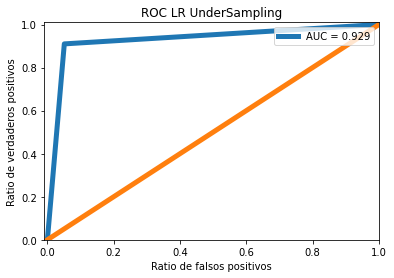

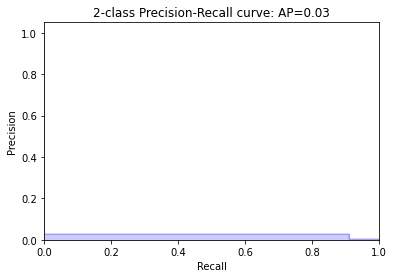

In [ ]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, y_pred_LR_U)

# Calculate Area Under the Receiver Operating Characteristic Curve 
roc_auc = roc_auc_score(yTest, y_pred_LR_U)
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(yTest, y_pred_LR_U)

# Calculate average precision 
average_precision = average_precision_score(yTest, y_pred_LR_U)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('ROC LR UnderSampling', color='k')
    plt.ylabel('Ratio de verdaderos positivos', color='k')
    plt.xlabel('Ratio de falsos positivos', color='k')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix
print('\n')
print("Número de puntos mal etiquetados de un total de %d puntos : %d"
      % (xTest.shape[0], (yTest != y_pred_LR_U).sum()))

print('\n')
print('Métricas LR UnderSampling:\n', classification_report(yTest, y_pred_LR_U))
print('\n')
print('Matriz de confusión LR:\n',confusion_matrix(y_true = yTest, y_pred = y_pred_LR_U))
print('\n')

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)
print('\n')

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

#### 7. NAIVE BAYES UNDER

In [ ]:

#se genera el modelo, se entrena y se predice
classifier_NB_U = GaussianNB()
classifier_NB_U.fit(X_undersam, y_undersam)
y_pred_NB_U = classifier_NB_U.predict(xTest)

# Se obtienen las metricas correspndientes
#accuracy
print("Accuracy: %.4f"%metrics.accuracy_score(yTest, y_pred_NB_U))

#errores
print("Número de puntos mal etiquetados de un total de %d puntos : %d"
      % (xTest.shape[0], (yTest != y_pred_NB_U).sum()))

#matriz de confusión
resultados_U = confusion_matrix(yTest, y_pred_NB_U)
print("Matriz de confusión:\n",resultados_U)

#classification report
clfrep_U=classification_report(yTest, y_pred_NB_U)
print(clfrep_U)

#area under the curve
fpr_U, tpr_U, thresholds_U = metrics.roc_curve(yTest, y_pred_NB_U)
auc_U=metrics.auc(fpr_U, tpr_U)
print("El resultado del AUC es: %.4f"% auc_U)


Accuracy: 0.9632
Número de puntos mal etiquetados de un total de 56962 puntos : 2094
Matriz de confusión:
 [[54784  2078]
 [   16    84]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56862
           1       0.04      0.84      0.07       100

    accuracy                           0.96     56962
   macro avg       0.52      0.90      0.53     56962
weighted avg       1.00      0.96      0.98     56962

El resultado del AUC es: 0.9017


In [ ]:
y_pred_NB_U = classifier_NB_U.predict(xTest)
acc_NB_U = accuracy_score(yTest, y_pred_NB_U)
prec_NB_U = precision_score(yTest, y_pred_NB_U)
rec_NB_U = recall_score(yTest, y_pred_NB_U)
f1_NB_U = f1_score(yTest, y_pred_NB_U)

In [ ]:
model_results_NB_U = pd.DataFrame([['NB (US) ', acc_NB_U, prec_NB_U, rec_NB_U, f1_NB_U]],
               columns = ['Model UnderSampling', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_U = results_U.append(model_results_NB_U, ignore_index = True)
results_U

,Model UnderSampling,Accuracy,Precision,Recall,F1 Score
0,Decision tree (US),0.894684,0.014486,0.88,0.028502
1,Random Forest (US) (n=100),0.977371,0.063830,0.87,0.118934
2,Red neuronal (US),0.950897,0.028991,0.83,0.056024
3,KNN (US),0.974896,0.058433,0.88,0.109589
4,LR (US),0.948896,0.030404,0.91,0.058843
5,NB (US),0.963239,0.038853,0.84,0.074271


ROC AUC Score: 0.9017276916042346


Métricas NB:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56862
           1       0.04      0.84      0.07       100

    accuracy                           0.96     56962
   macro avg       0.52      0.90      0.53     56962
weighted avg       1.00      0.96      0.98     56962



Matriz de confusión NB:
 [[54784  2078]
 [   16    84]]




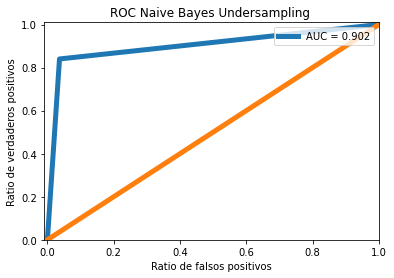

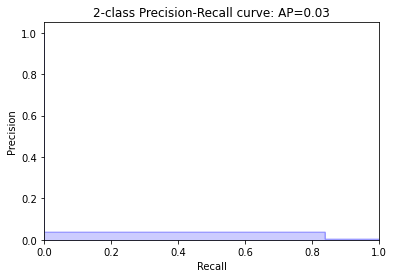

In [ ]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, y_pred_NB_U)

# Calculate Area Under the Receiver Operating Characteristic Curve 
roc_auc = roc_auc_score(yTest, y_pred_NB_U)
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(yTest, y_pred_NB_U)

# Calculate average precision 
average_precision = average_precision_score(yTest, y_pred_NB_U)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('ROC Naive Bayes Undersampling ', color='k')
    plt.ylabel('Ratio de verdaderos positivos', color='k')
    plt.xlabel('Ratio de falsos positivos', color='k')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix
print('\n')
print('Métricas NB:\n', classification_report(yTest, y_pred_NB_U))
print('\n')
print('Matriz de confusión NB:\n',confusion_matrix(y_true = yTest, y_pred = y_pred_NB_U))
print('\n')

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)
print('\n')

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

### Resultados UnderSampling

In [ ]:
results_U

,Model UnderSampling,Accuracy,Precision,Recall,F1 Score
0,Decision tree (US),0.894684,0.014486,0.88,0.028502
1,Random Forest (US) (n=100),0.977371,0.063830,0.87,0.118934
2,Red neuronal (US),0.950897,0.028991,0.83,0.056024
3,KNN (US),0.974896,0.058433,0.88,0.109589
4,LR (US),0.948896,0.030404,0.91,0.058843
5,NB (US),0.963239,0.038853,0.84,0.074271


### Original

#### 1. Decision Tree Original


In [ ]:
## Decison Tree
classifierDT = DecisionTreeClassifier(random_state = 0,
                                    criterion = 'gini',  splitter='best', min_samples_leaf=1, min_samples_split=2)
classifierDT.fit(xTrain, yTrain)
# Predicting Test Set
y_pred_DT = classifierDT.predict(xTest)
acc_DT = accuracy_score(yTest, y_pred_DT)
prec_DT = precision_score(yTest, y_pred_DT)
rec_DT = recall_score(yTest, y_pred_DT)
f1_DT = f1_score(yTest, y_pred_DT)



In [ ]:
results = pd.DataFrame([['Decision tree ', acc_DT, prec_DT, rec_DT, f1_DT]],
               columns = ['Model Original', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results

,Model Original,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.998999,0.700935,0.75,0.724638


ROC AUC Score: 0.8747186170025676


Número de puntos mal etiquetados de un total de 56962 puntos : 57


Métricas Decision tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.70      0.75      0.72       100

    accuracy                           1.00     56962
   macro avg       0.85      0.87      0.86     56962
weighted avg       1.00      1.00      1.00     56962



Matriz de confusión Decision tree :
 [[56830    32]
 [   25    75]]




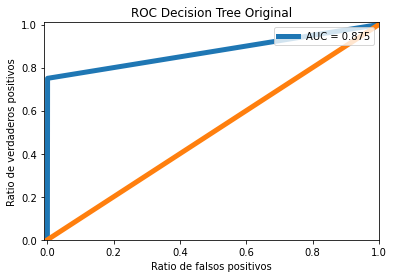

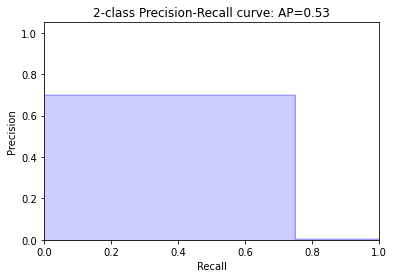

In [ ]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, y_pred_DT)

# Calculate Area Under the Receiver Operating Characteristic Curve 
roc_auc = roc_auc_score(yTest, y_pred_DT)
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(yTest, y_pred_DT)

# Calculate average precision 
average_precision = average_precision_score(yTest, y_pred_DT)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('ROC Decision Tree Original', color='k')
    plt.ylabel('Ratio de verdaderos positivos', color='k')
    plt.xlabel('Ratio de falsos positivos', color='k')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix
print('\n')
print("Número de puntos mal etiquetados de un total de %d puntos : %d"
      % (xTest.shape[0], (yTest != y_pred_DT).sum()))
print('\n')
print('Métricas Decision tree:\n', classification_report(yTest, y_pred_DT))
print('\n')
print('Matriz de confusión Decision tree :\n',confusion_matrix(y_true = yTest, y_pred = y_pred_DT))
print('\n')

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)
print('\n')

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

#### 2. Random forest Original

In [ ]:
## Randomforest

classifierRF = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifierRF.fit(xTrain, yTrain)
# Predicting Test Set
y_pred_RF = classifierRF.predict(xTest)
acc_RF = accuracy_score(yTest, y_pred_RF)
prec_RF = precision_score(yTest, y_pred_RF)
rec_RF = recall_score(yTest, y_pred_RF)
f1_RF = f1_score(yTest, y_pred_RF)


In [ ]:
model_results_RF = pd.DataFrame([['Random Forest ', acc_RF, prec_RF, rec_RF, f1_RF]],
               columns = ['Model Original', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results_RF, ignore_index = True)
results

,Model Original,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.998999,0.700935,0.75,0.724638
1,Random Forest,0.999473,0.948718,0.74,0.831461


ROC AUC Score: 0.869964827125321


Número de puntos mal etiquetados de un total de 56962 puntos : 30


Métricas Random forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.95      0.74      0.83       100

    accuracy                           1.00     56962
   macro avg       0.97      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



Matriz de confusión Random forest:
 [[56858     4]
 [   26    74]]




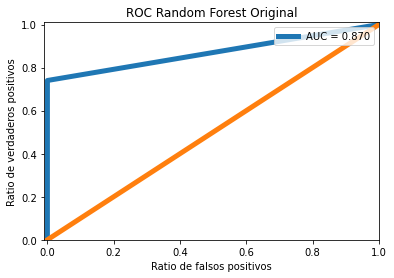

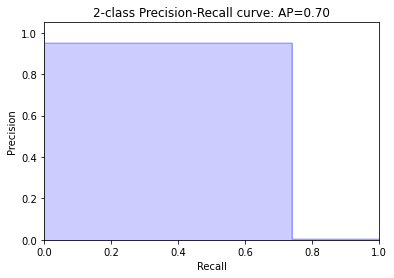

In [ ]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, y_pred_RF)

# Calculate Area Under the Receiver Operating Characteristic Curve 
roc_auc = roc_auc_score(yTest, y_pred_RF)
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(yTest, y_pred_RF)

# Calculate average precision 
average_precision = average_precision_score(yTest, y_pred_RF)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('ROC Random Forest Original', color='k')
    plt.ylabel('Ratio de verdaderos positivos', color='k')
    plt.xlabel('Ratio de falsos positivos', color='k')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix

print('\n')
print("Número de puntos mal etiquetados de un total de %d puntos : %d"
      % (xTest.shape[0], (yTest != y_pred_RF).sum()))

print('\n')
print('Métricas Random forest:\n', classification_report(yTest, y_pred_RF))
print('\n')
print('Matriz de confusión Random forest:\n',confusion_matrix(y_true = yTest, y_pred = y_pred_RF))
print('\n')

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)
print('\n')

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

#### 3. Red neuronal Original

In [ ]:
def plot_acc(history, title="Model Accuracy"):
    """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
def plot_loss(history, title="Model Loss"):
    """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()
    
def plot_compare_losses(history1, history2, name1="Red 1",
                        name2="Red 2", title="Graph title"):
    """Compara losses de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2],
               loc='upper right')
    plt.show()
    
def plot_compare_accs(history1, history2, name1="Red 1",
                      name2="Red 2", title="Graph title"):
    """Compara accuracies de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['accuracy'], color="green")
    plt.plot(history1.history['val_accuracy'], 'r--', color="green")
    plt.plot(history2.history['accuracy'], color="blue")
    plt.plot(history2.history['val_accuracy'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2], 
               loc='lower right')
    plt.show()
 


In [ ]:
'''# Initialising the ANN
classifierNN = Sequential()
# Adding the input layer and the first hidden layer
classifierNN.add(Dense(units =16 ,  activation = 'relu', input_dim = 29))
# Adding the second hidden layer
classifierNN.add(Dense(units = 16, activation = 'relu'))

classifierNN.add(Dense(units = 16, activation = 'relu'))

# Adding the output layer
classifierNN.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the ANN
classifierNN.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set'''

classifierNN = Sequential()
classifierNN.add(Dense(64, activation="relu", input_dim=(xTrain.shape[1])))
classifierNN.add(Dense(16, activation="relu"))
classifierNN.add(Dense(16, activation="relu"))
classifierNN.add(Dense(1, activation="sigmoid"))
classifierNN.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])
classifierNN.summary()



my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=7,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)]


start_training_NN = time.time() #time
history1=classifierNN.fit(xTrain, yTrain, batch_size = 32, epochs = 50, validation_split=0.4, callbacks=my_callbacks)
stop_training_NN = time.time() #time
train_time_NN=stop_training_NN - start_training_NN #time
print(f"Training time: {train_time_NN}s") #time




Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 64)                1920      
_________________________________________________________________
dense_67 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_68 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 17        
Total params: 3,249
Trainable params: 3,249
Non-trainable params: 0
_________________________________________________________________
Train on 136707 samples, validate on 91138 samples
Epoch 1/15
136707/136707 [==============================] - 8s 56us/step - loss: 0.0091 - accuracy: 0.9991 - val_loss: 0.0027 - val_accuracy: 0.9995
Epoch 2/15
136707/136707 [=======================

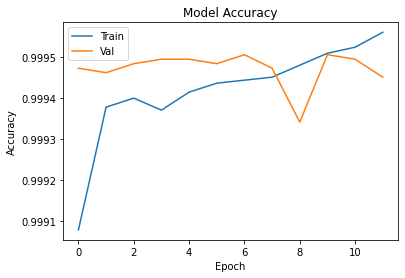

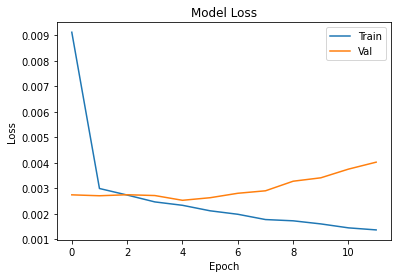

In [ ]:
plot_acc(history1)
plot_loss(history1)

In [ ]:

# Predicting Test Set
start_predicting_NN = time.time() #time
y_pred_NN = classifierNN.predict(xTest)
stop_predicting_NN = time.time() #time
pred_time_NN=stop_predicting_NN - start_predicting_NN #time
print(f"Prediction time: {pred_time_NN}s") #time


y_pred_NN=np.around(y_pred_NN)
accNN = accuracy_score(yTest, y_pred_NN)
precNN = precision_score(yTest, y_pred_NN)
recNN = recall_score(yTest, y_pred_NN)
f1NN = f1_score(yTest, y_pred_NN)

Prediction time: 0.7148287296295166s


In [ ]:
model_results = pd.DataFrame([['Red neuronal' , accNN, precNN, recNN, f1NN]],
               columns = ['Model Original', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
results

,Model Original,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.998999,0.700935,0.75,0.724638
1,Random Forest,0.999473,0.948718,0.74,0.831461
2,Red neuronal,0.999280,0.804124,0.78,0.791878
3,KNN,0.999456,0.925926,0.75,0.828729
4,LR,0.999105,0.845070,0.60,0.701754
5,NB,0.977388,0.059347,0.80,0.110497
6,Red neuronal,0.999210,0.772277,0.78,0.776119


In [ ]:
y_pred_NN = classifierNN.predict(xTest)
y_pred_NN = (y_pred_NN > 0.5)
score = classifierNN.evaluate(xTest, yTest)
score

56962/56962 [==============================] - 1s 19us/step


[0.005213108839526225, 0.9992802143096924]

In [ ]:
#Let's see how our model performed
print(classification_report(yTest, y_pred_NN))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.80      0.78      0.79       100

    accuracy                           1.00     56962
   macro avg       0.90      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962



ROC AUC Score: 0.8897977559705955


Número de puntos mal etiquetados de un total de 56962 puntos : 11429162


Métricas Red neuronal:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.77      0.78      0.78       100

    accuracy                           1.00     56962
   macro avg       0.89      0.89      0.89     56962
weighted avg       1.00      1.00      1.00     56962



Matriz Red neuronal:
 [[56839    23]
 [   22    78]]




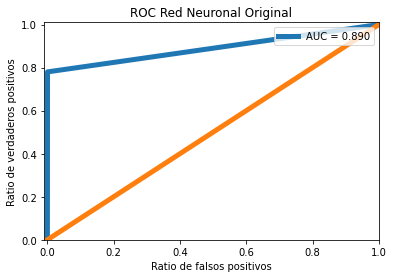

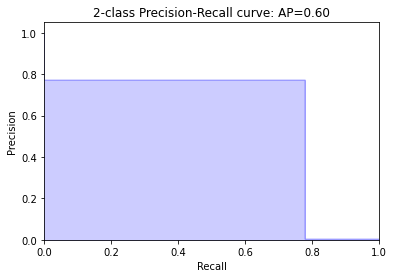

In [ ]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, y_pred_NN)

# Calculate Area Under the Receiver Operating Characteristic Curve 
roc_auc = roc_auc_score(yTest, y_pred_NN)
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(yTest, y_pred_NN)

# Calculate average precision 
average_precision = average_precision_score(yTest, y_pred_NN)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('ROC Red Neuronal Original', color='black')
    plt.ylabel('Ratio de verdaderos positivos', color='black')
    plt.xlabel('Ratio de falsos positivos', color='black')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix

print('\n')
print("Número de puntos mal etiquetados de un total de %d puntos : %d"
      % (xTest.shape[0], (yTest != y_pred_NN).sum()))

print('\n')
print('Métricas Red neuronal:\n', classification_report(yTest, y_pred_NN))
print('\n')
print('Matriz Red neuronal:\n',confusion_matrix(y_true = yTest, y_pred = y_pred_NN))
print('\n')

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)
print('\n')

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

#### 4. SVM Original

In [ ]:
'''classifier_SVM = svm.SVC(kernel='linear') 
classifier_SVM.fit(xTrain, yTrain)'''

"classifier_SVM = svm.SVC(kernel='linear') \nclassifier_SVM.fit(xTrain, yTrain)"

In [ ]:
'''

# Predicting Test Set
y_pred_SVM = classifier_SVM.predict(xTest)
acc_SVM = accuracy_score(yTest, y_pred_SVM)
prec_SVM = precision_score(yTest, y_pred_SVM)
rec_SVM = recall_score(yTest, y_pred_SVM)
f1_SVM = f1_score(yTest, y_pred_SVM)
'''

'\n\n# Predicting Test Set\ny_pred_SVM = classifier_SVM.predict(xTest)\nacc_SVM = accuracy_score(yTest, y_pred_SVM)\nprec_SVM = precision_score(yTest, y_pred_SVM)\nrec_SVM = recall_score(yTest, y_pred_SVM)\nf1_SVM = f1_score(yTest, y_pred_SVM)\n'

In [ ]:
'''model_results_SVM = pd.DataFrame([['SVM', acc_SVM, prec_SVM, rec_SVM, f1_SVM]],
               columns = ['Model Original', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results_KNN, ignore_index = True)

results'''

"model_results_SVM = pd.DataFrame([['SVM', acc_SVM, prec_SVM, rec_SVM, f1_SVM]],\n               columns = ['Model Original', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])\nresults = results.append(model_results_KNN, ignore_index = True)\n\nresults"

#### 5. KNN Original

In [ ]:
classifier_KNN = KNeighborsClassifier(n_neighbors=5)
start_training_KNN = time.time() #time
classifier_KNN.fit(xTrain, yTrain)
stop_training_KNN = time.time() #time
train_time_KNN=stop_training_KNN - start_training_KNN #time
print(f"Training time: {train_time_KNN}s") #time



Training time: 1.9448797702789307s


In [ ]:

# Predicting Test Set
start_predicting_KNN = time.time() #time
y_pred_KNN = classifier_KNN.predict(xTest)
stop_predicting_KNN = time.time() #time
pred_time_KNN=stop_predicting_KNN - start_predicting_KNN #time
print(f"Prediction time: {pred_time_KNN}s") #time

acc_KNN = accuracy_score(yTest, y_pred_KNN)
prec_KNN = precision_score(yTest, y_pred_KNN)
rec_KNN = recall_score(yTest, y_pred_KNN)
f1_KNN = f1_score(yTest, y_pred_KNN)





Prediction time: 211.52971982955933s


In [ ]:
model_results_KNN = pd.DataFrame([['KNN ', acc_KNN, prec_KNN, rec_KNN, f1_KNN]],
               columns = ['Model Original', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results_KNN, ignore_index = True)

results

,Model Original,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.998999,0.700935,0.75,0.724638
1,Random Forest,0.999473,0.948718,0.74,0.831461
2,Red neuronal,0.999280,0.804124,0.78,0.791878
3,KNN,0.999456,0.925926,0.75,0.828729


ROC AUC Score: 0.8749472406879815


Número de puntos mal etiquetados de un total de 56962 puntos : 31


Métricas KNN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.93      0.75      0.83       100

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



Matriz de confusión KNN:
 [[56856     6]
 [   25    75]]




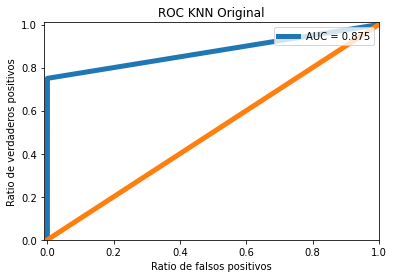

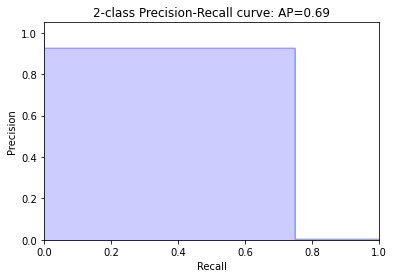

In [ ]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, y_pred_KNN)

# Calculate Area Under the Receiver Operating Characteristic Curve 
roc_auc = roc_auc_score(yTest, y_pred_KNN)
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(yTest, y_pred_KNN)

# Calculate average precision 
average_precision = average_precision_score(yTest, y_pred_KNN)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('ROC KNN Original', color='black')
    plt.ylabel('Ratio de verdaderos positivos', color='black')
    plt.xlabel('Ratio de falsos positivos', color='black')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix

print('\n')
print("Número de puntos mal etiquetados de un total de %d puntos : %d"
      % (xTest.shape[0], (yTest != y_pred_KNN).sum()))

print('\n')
print('Métricas KNN:\n', classification_report(yTest, y_pred_KNN))
print('\n')
print('Matriz de confusión KNN:\n',confusion_matrix(y_true = yTest, y_pred = y_pred_KNN))
print('\n')

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)
print('\n')

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

#### 6. REGRESIÓN LOGÍSTICA Original

In [ ]:
classifier_LR = LogisticRegression(random_state=0)


start_training_LR = time.time() #time
classifier_LR.fit(xTrain, yTrain)
stop_training_LR = time.time() #time
train_time_LR=stop_training_LR - start_training_LR #time
print(f"Training time: {train_time_LR}s") #time


Training time: 4.153473854064941s


In [ ]:


# Predicting Test Set
start_predicting_LR = time.time() #time
y_pred_LR = classifier_LR.predict(xTest)
stop_predicting_LR = time.time() #time
pred_time_LR=stop_predicting_LR - start_predicting_LR #time
print(f"Prediction time: {pred_time_LR}s") #time

acc_LR = accuracy_score(yTest, y_pred_LR)
prec_LR = precision_score(yTest, y_pred_LR)
rec_LR = recall_score(yTest, y_pred_LR)
f1_LR = f1_score(yTest, y_pred_LR)

Prediction time: 0.018654346466064453s


In [ ]:
model_results_LR = pd.DataFrame([['LR  ', acc_LR, prec_LR, rec_LR, f1_LR]],
               columns = ['Model Original', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results_LR, ignore_index = True)

results

,Model Original,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.998999,0.700935,0.75,0.724638
1,Random Forest,0.999473,0.948718,0.74,0.831461
2,Red neuronal,0.999280,0.804124,0.78,0.791878
3,KNN,0.999456,0.925926,0.75,0.828729
4,LR,0.999105,0.845070,0.60,0.701754


ROC AUC Score: 0.7999032745946327


Número de puntos mal etiquetados de un total de 56962 puntos : 51


Métricas LR:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.85      0.60      0.70       100

    accuracy                           1.00     56962
   macro avg       0.92      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962



Matriz de confusión LR:
 [[56851    11]
 [   40    60]]




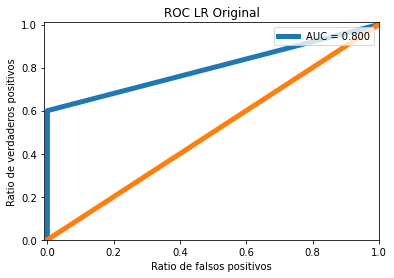

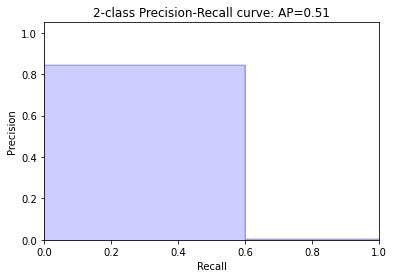

In [ ]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, y_pred_LR)

# Calculate Area Under the Receiver Operating Characteristic Curve 
roc_auc = roc_auc_score(yTest, y_pred_LR)
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(yTest, y_pred_LR)

# Calculate average precision 
average_precision = average_precision_score(yTest, y_pred_LR)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('ROC LR Original', color='black')
    plt.ylabel('Ratio de verdaderos positivos', color='black')
    plt.xlabel('Ratio de falsos positivos', color='black')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix
print('\n')
print("Número de puntos mal etiquetados de un total de %d puntos : %d"
      % (xTest.shape[0], (yTest != y_pred_LR).sum()))

print('\n')
print('Métricas LR:\n', classification_report(yTest, y_pred_LR))
print('\n')
print('Matriz de confusión LR:\n',confusion_matrix(y_true = yTest, y_pred = y_pred_LR))
print('\n')

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)
print('\n')

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

#### 7. NAIVE BAYES Original

In [ ]:

#se genera el modelo, se entrena y se predice
classifier_NB = GaussianNB()
classifier_NB.fit(xTrain, yTrain)
y_pred_NB = classifier_NB.predict(xTest)

# Se obtienen las metricas correspndientes
#accuracy
print("Accuracy: %.4f"%metrics.accuracy_score(yTest, y_pred_NB))

#errores
print("Número de puntos mal etiquetados de un total de %d puntos : %d"
      % (xTest.shape[0], (yTest != y_pred_NB).sum()))

#matriz de confusión
resultados = confusion_matrix(yTest, y_pred_NB)
print("Matriz de confusión:\n",resultados)

#classification report
clfrep=classification_report(yTest, y_pred_NB)
print(clfrep)

#area under the curve
fpr, tpr, thresholds = metrics.roc_curve(yTest, y_pred_NB)
auc=metrics.auc(fpr, tpr)
print("El resultado del AUC es: %.4f"% auc)


Accuracy: 0.9774
Número de puntos mal etiquetados de un total de 56962 puntos : 1288
Matriz de confusión:
 [[55594  1268]
 [   20    80]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56862
           1       0.06      0.80      0.11       100

    accuracy                           0.98     56962
   macro avg       0.53      0.89      0.55     56962
weighted avg       1.00      0.98      0.99     56962

El resultado del AUC es: 0.8889


In [ ]:
y_pred_NB = classifier_NB.predict(xTest)
acc_NB = accuracy_score(yTest, y_pred_NB)
prec_NB = precision_score(yTest, y_pred_NB)
rec_NB = recall_score(yTest, y_pred_NB)
f1_NB = f1_score(yTest, y_pred_NB)

In [ ]:
model_results_NB = pd.DataFrame([['NB ', acc_NB, prec_NB, rec_NB, f1_NB]],
               columns = ['Model Original', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results_NB, ignore_index = True)
results

,Model Original,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.998999,0.700935,0.75,0.724638
1,Random Forest,0.999473,0.948718,0.74,0.831461
2,Red neuronal,0.999280,0.804124,0.78,0.791878
3,KNN,0.999456,0.925926,0.75,0.828729
4,LR,0.999105,0.845070,0.60,0.701754
5,NB,0.977388,0.059347,0.80,0.110497


ROC AUC Score: 0.888850198726742


Métricas NB:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56862
           1       0.06      0.80      0.11       100

    accuracy                           0.98     56962
   macro avg       0.53      0.89      0.55     56962
weighted avg       1.00      0.98      0.99     56962



Matriz de confusión NB:
 [[55594  1268]
 [   20    80]]




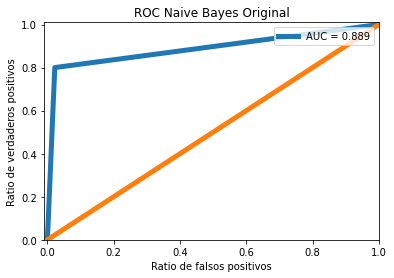

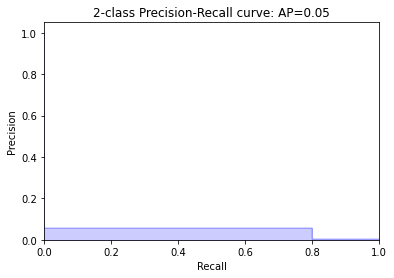

In [ ]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, y_pred_NB)

# Calculate Area Under the Receiver Operating Characteristic Curve 
roc_auc = roc_auc_score(yTest, y_pred_NB)
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(yTest, y_pred_NB)

# Calculate average precision 
average_precision = average_precision_score(yTest, y_pred_NB)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('ROC Naive Bayes Original', color='black')
    plt.ylabel('Ratio de verdaderos positivos', color='black')
    plt.xlabel('Ratio de falsos positivos', color='black')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix
print('\n')
print('Métricas NB:\n', classification_report(yTest, y_pred_NB))
print('\n')
print('Matriz de confusión NB:\n',confusion_matrix(y_true = yTest, y_pred = y_pred_NB))
print('\n')

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)
print('\n')

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

### Resultados Original

In [ ]:
results

,Model Original,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.998999,0.700935,0.75,0.724638
1,Random Forest,0.999473,0.948718,0.74,0.831461
2,Red neuronal,0.999280,0.804124,0.78,0.791878
3,KNN,0.999456,0.925926,0.75,0.828729
4,LR,0.999105,0.845070,0.60,0.701754
5,NB,0.977388,0.059347,0.80,0.110497


## Modelos de Aprendizaje NO supervisado

### Oversampling

#### 1. Kmeans OVER


In [ ]:
kmeans_O=KMeans(n_clusters=2,random_state=0,algorithm="elkan",max_iter=100000,n_jobs=-1)
start_training_KM = time.time() #time
kmeans_O.fit(X_oversam)
stop_training_KM = time.time() #time
train_time_KM=stop_training_KM - start_training_KM #time
print(f"Training time: {train_time_KM}s") #time

# Predicting Test Set
start_predicting_KM = time.time() #time
y_pred_kmeans_O=kmeans_O.predict(xTest)
stop_predicting_KM = time.time() #time
pred_time_KM=stop_predicting_KM - start_predicting_KM #time
print(f"Prediction time: {pred_time_KM}s") #time



Training time: 8.82040548324585s
Prediction time: 0.026552915573120117s


In [ ]:
acc_kmeans_O = accuracy_score(yTest, y_pred_kmeans_O)
prec_kmeans_O = precision_score(yTest, y_pred_kmeans_O)
rec_kmeans_O = recall_score(yTest, y_pred_kmeans_O)
f1_kmeans_O = f1_score(yTest, y_pred_kmeans_O)


In [ ]:
results_NOSUP_O = pd.DataFrame([['K means', acc_kmeans_O, prec_kmeans_O, rec_kmeans_O, f1_kmeans_O]],
               columns = ['Model ', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_NOSUP_O

,Model,Accuracy,Precision,Recall,F1 Score
0,K means,0.998631,0.761905,0.32,0.450704


ROC AUC Score: 0.6599120678133025


Número de puntos mal etiquetados de un total de 56962 puntos : 78


Métricas K-means:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.76      0.32      0.45       100

    accuracy                           1.00     56962
   macro avg       0.88      0.66      0.73     56962
weighted avg       1.00      1.00      1.00     56962



Matriz de confusion K-means:
 [[56852    10]
 [   68    32]]




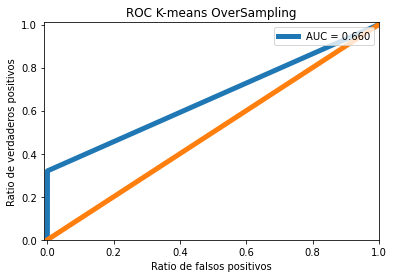

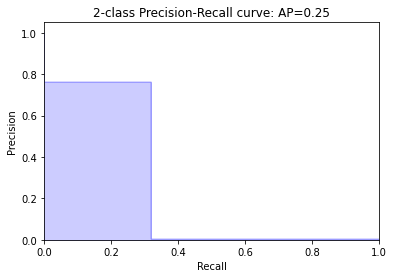

In [ ]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, y_pred_kmeans_O)

# Calculate Area Under the Receiver Operating Characteristic Curve 
roc_auc = roc_auc_score(yTest, y_pred_kmeans_O)
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(yTest, y_pred_kmeans_O)

# Calculate average precision 
average_precision = average_precision_score(yTest, y_pred_kmeans_O)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('ROC K-means OverSampling', color='k')
    plt.ylabel('Ratio de verdaderos positivos', color='k')
    plt.xlabel('Ratio de falsos positivos', color='k')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix

print('\n')
print("Número de puntos mal etiquetados de un total de %d puntos : %d"
      % (xTest.shape[0], (yTest != y_pred_kmeans_O).sum()))

print('\n')
print('Métricas K-means:\n', classification_report(yTest, y_pred_kmeans_O))
print('\n')
print('Matriz de confusion K-means:\n',confusion_matrix(y_true = yTest, y_pred = y_pred_kmeans_O))
print('\n')

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)
print('\n')

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

#### 2. Isolation OVER


In [ ]:
clf_IF_O = IsolationForest(n_estimators=10, warm_start=True)
start_training_IF = time.time() #time

clf_IF_O.fit(X_oversam)
clf_IF_O.set_params(n_estimators=20)
clf_IF_O.fit(X_oversam)

stop_training_IF = time.time() #time
train_time_IF=stop_training_IF - start_training_IF #time
print(f"Training time: {train_time_IF}s") #time

# Predicting Test Set
start_predicting_IF = time.time() #time
y_pred_IF_O=clf_IF_O.predict(xTest)
stop_predicting_IF = time.time() #time
pred_time_IF=stop_predicting_IF - start_predicting_IF #time
print(f"Prediction time: {pred_time_IF}s") #time


Training time: 4.334341764450073s
Prediction time: 0.5114612579345703s


In [ ]:
 #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
y_pred_IF_O[y_pred_IF_O == 1] = 0
y_pred_IF_O[y_pred_IF_O == -1] = 1

In [ ]:
acc_IF_O = accuracy_score(yTest, y_pred_IF_O)
prec_IF_O = precision_score(yTest, y_pred_IF_O, pos_label='positive',
                                           average='weighted')
rec_IF_O = recall_score(yTest, y_pred_IF_O, pos_label='positive',
                                           average='weighted')
f1_IF_O = f1_score(yTest, y_pred_IF_O, pos_label='positive',
                                           average='weighted')


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [ ]:
model_results_NOSUP_IF_O = pd.DataFrame([['Isolation forest', acc_IF_O, prec_IF_O, rec_IF_O, f1_IF_O]],
               columns = ['Model ', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_NOSUP_O = results_NOSUP_O.append(model_results_NOSUP_IF_O, ignore_index = True)

results_NOSUP_O

,Model,Accuracy,Precision,Recall,F1 Score
0,K means,0.998631,0.761905,0.320000,0.450704
1,Isolation forest,0.987957,0.996984,0.987957,0.992314


ROC AUC Score: 0.6196273433927755


Número de puntos mal etiquetados de un total de 56962 puntos : 686


Métricas IF:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56862
           1       0.04      0.25      0.07       100

    accuracy                           0.99     56962
   macro avg       0.52      0.62      0.53     56962
weighted avg       1.00      0.99      0.99     56962



Matriz de confusión IF:
 [[56251   611]
 [   75    25]]




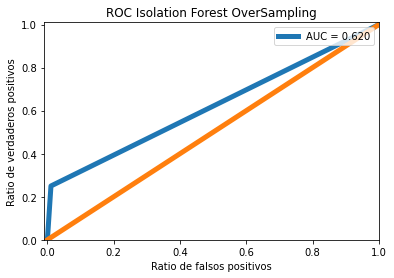

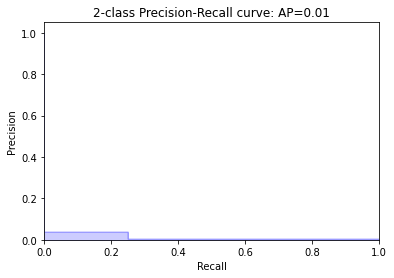

In [ ]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, y_pred_IF_O)

# Calculate Area Under the Receiver Operating Characteristic Curve 
roc_auc = roc_auc_score(yTest, y_pred_IF_O)
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(yTest, y_pred_IF_O)

# Calculate average precision 
average_precision = average_precision_score(yTest, y_pred_IF_O)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('ROC Isolation Forest OverSampling', color='k')
    plt.ylabel('Ratio de verdaderos positivos', color='k')
    plt.xlabel('Ratio de falsos positivos', color='k')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix
print('\n')
print("Número de puntos mal etiquetados de un total de %d puntos : %d"
      % (xTest.shape[0], (yTest != y_pred_IF_O).sum()))

print('\n')
print('Métricas IF:\n', classification_report(yTest, y_pred_IF_O))
print('\n')
print('Matriz de confusión IF:\n',confusion_matrix(y_true = yTest, y_pred = y_pred_IF_O))
print('\n')

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)
print('\n')

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

### Undersampling

#### 1. Kmeans UNDER


In [ ]:
kmeans_U=KMeans(n_clusters=2,random_state=0,algorithm="elkan",max_iter=100000,n_jobs=-1)
kmeans_U.fit(X_undersam)
y_pred_kmeans_U=kmeans_U.predict(xTest)

In [ ]:
acc_kmeans_U = accuracy_score(yTest, y_pred_kmeans_U)
prec_kmeans_U = precision_score(yTest, y_pred_kmeans_U)
rec_kmeans_U = recall_score(yTest, y_pred_kmeans_U)
f1_kmeans_U = f1_score(yTest, y_pred_kmeans_U)


In [ ]:
results_NOSUP_U = pd.DataFrame([['K means', acc_kmeans_U, prec_kmeans_U, rec_kmeans_U, f1_kmeans_U]],
               columns = ['Model ', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_NOSUP_U

,Model,Accuracy,Precision,Recall,F1 Score
0,K means,0.998631,0.761905,0.32,0.450704


ROC AUC Score: 0.6599120678133025


Número de puntos mal etiquetados de un total de 56962 puntos : 78


Métricas K-means:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.76      0.32      0.45       100

    accuracy                           1.00     56962
   macro avg       0.88      0.66      0.73     56962
weighted avg       1.00      1.00      1.00     56962



Matriz K-means:
 [[56852    10]
 [   68    32]]




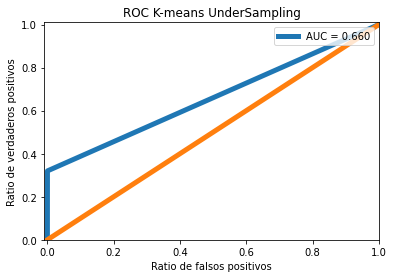

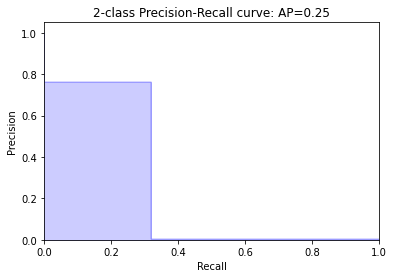

In [ ]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, y_pred_kmeans_U)

# Calculate Area Under the Receiver Operating Characteristic Curve 
roc_auc = roc_auc_score(yTest, y_pred_kmeans_U)
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(yTest, y_pred_kmeans_U)

# Calculate average precision 
average_precision = average_precision_score(yTest, y_pred_kmeans_U)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('ROC K-means UnderSampling', color='black')
    plt.ylabel('Ratio de verdaderos positivos', color='black')
    plt.xlabel('Ratio de falsos positivos', color='black')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix

print('\n')
print("Número de puntos mal etiquetados de un total de %d puntos : %d"
      % (xTest.shape[0], (yTest != y_pred_kmeans_U).sum()))

print('\n')
print('Métricas K-means:\n', classification_report(yTest, y_pred_kmeans_U))
print('\n')
print('Matriz K-means:\n',confusion_matrix(y_true = yTest, y_pred = y_pred_kmeans_U))
print('\n')

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)
print('\n')

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

#### 2. Isolation UNDER



In [ ]:
clf_IF_U = IsolationForest(n_estimators=10, warm_start=True)
clf_IF_U.fit(X_undersam)
clf_IF_U.set_params(n_estimators=20)
clf_IF_U.fit(X_undersam)
y_pred_IF_U=clf_IF_U.predict(xTest)




In [ ]:
 #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
y_pred_IF_U[y_pred_IF_U == 1] = 0
y_pred_IF_U[y_pred_IF_U == -1] = 1

In [ ]:
acc_IF_U = accuracy_score(yTest, y_pred_IF_O)
prec_IF_U = precision_score(yTest, y_pred_IF_O, pos_label='positive',
                                           average='weighted')
rec_IF_U = recall_score(yTest, y_pred_IF_O, pos_label='positive',
                                           average='weighted')
f1_IF_U = f1_score(yTest, y_pred_IF_O, pos_label='positive',
                                           average='weighted')


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [ ]:
model_results_NOSUP_IF_U = pd.DataFrame([['Isolation forest', acc_IF_U, prec_IF_U, rec_IF_U, f1_IF_U]],
               columns = ['Model ', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_NOSUP_U = results_NOSUP_U.append(model_results_NOSUP_IF_U, ignore_index = True)

results_NOSUP_U

,Model,Accuracy,Precision,Recall,F1 Score
0,K means,0.998631,0.761905,0.320000,0.450704
1,Isolation forest,0.987957,0.996984,0.987957,0.992314


ROC AUC Score: 0.6207264957264957


Número de puntos mal etiquetados de un total de 56962 puntos : 561


Métricas IF:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56862
           1       0.05      0.25      0.08       100

    accuracy                           0.99     56962
   macro avg       0.52      0.62      0.54     56962
weighted avg       1.00      0.99      0.99     56962



Matriz de confusión IF:
 [[56376   486]
 [   75    25]]




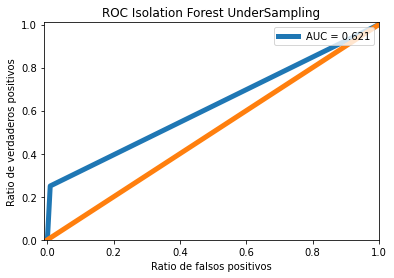

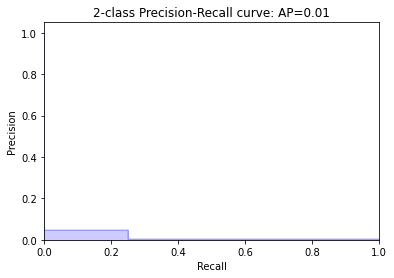

In [ ]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, y_pred_IF_U)

# Calculate Area Under the Receiver Operating Characteristic Curve 
roc_auc = roc_auc_score(yTest, y_pred_IF_U)
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(yTest, y_pred_IF_U)

# Calculate average precision 
average_precision = average_precision_score(yTest, y_pred_IF_U)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('ROC Isolation Forest UnderSampling', color='k')
    plt.ylabel('Ratio de verdaderos positivos', color='k')
    plt.xlabel('Ratio de falsos positivos', color='k')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix
print('\n')
print("Número de puntos mal etiquetados de un total de %d puntos : %d"
      % (xTest.shape[0], (yTest != y_pred_IF_U).sum()))

print('\n')
print('Métricas IF:\n', classification_report(yTest, y_pred_IF_U))
print('\n')
print('Matriz de confusión IF:\n',confusion_matrix(y_true = yTest, y_pred = y_pred_IF_U))
print('\n')

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)
print('\n')

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

#### 3. OneClassSVM UNDER


In [ ]:
from sklearn.svm import OneClassSVM


start_training_OCSVM = time.time() #time

clf_OneClassSVM_U = OneClassSVM(gamma='auto').fit(X_undersam)

stop_training_OCSVM = time.time() #time
train_time_OCSVM=stop_training_OCSVM - start_training_OCSVM #time
print(f"Training time: {train_time_OCSVM}s") #time

# Predicting Test Set
start_predicting_OCSVM = time.time() #time

y_pred_OneClassSVM_U=clf_OneClassSVM_U.predict(xTest)

stop_predicting_OCSVM = time.time() #time
pred_time_OCSVM=stop_predicting_OCSVM - start_predicting_OCSVM #time
print(f"Prediction time: {pred_time_OCSVM}s") #time


Training time: 0.05302119255065918s
Prediction time: 1.4305121898651123s


In [ ]:
 #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
y_pred_OneClassSVM_U[y_pred_OneClassSVM_U == 1] = 0
y_pred_OneClassSVM_U[y_pred_OneClassSVM_U == -1] = 1

In [ ]:
clf_OneClassSVM_U.score_samples(xTest)
acc_OneClassSVM_U = accuracy_score(yTest, y_pred_OneClassSVM_U)
prec_OneClassSVM_U = precision_score(yTest, y_pred_OneClassSVM_U)
rec_OneClassSVM_U = recall_score(yTest, y_pred_OneClassSVM_U)
f1_OneClassSVM_U = f1_score(yTest, y_pred_OneClassSVM_U)


In [ ]:
model_results_NOSUP_1ClassSVM_U = pd.DataFrame([['One Class SVM', acc_OneClassSVM_U, prec_OneClassSVM_U, rec_OneClassSVM_U, f1_OneClassSVM_U]],
               columns = ['Model ', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_NOSUP_O = results_NOSUP_O.append(model_results_NOSUP_1ClassSVM_U, ignore_index = True)

results_NOSUP_O

,Model,Accuracy,Precision,Recall,F1 Score
0,K means,0.998631,0.761905,0.320000,0.450704
1,Isolation forest,0.987957,0.996984,0.987957,0.992314
2,One Class SVM,0.788017,0.006023,0.730000,0.011947


ROC AUC Score: 0.7590593014667089


Número de puntos mal etiquetados de un total de 56962 puntos : 12075


Métricas OCSVM:
               precision    recall  f1-score   support

           0       1.00      0.79      0.88     56862
           1       0.01      0.73      0.01       100

    accuracy                           0.79     56962
   macro avg       0.50      0.76      0.45     56962
weighted avg       1.00      0.79      0.88     56962



Matriz OCSVM:
 [[44814 12048]
 [   27    73]]




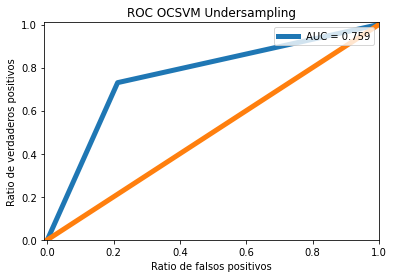

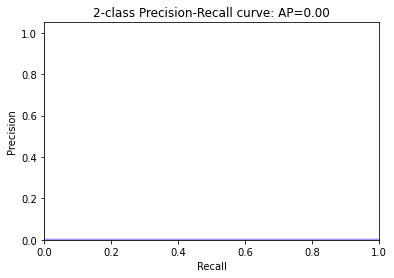

In [ ]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, y_pred_OneClassSVM_U)

# Calculate Area Under the Receiver Operating Characteristic Curve 
roc_auc = roc_auc_score(yTest, y_pred_OneClassSVM_U)
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(yTest, y_pred_OneClassSVM_U)

# Calculate average precision 
average_precision = average_precision_score(yTest, y_pred_OneClassSVM_U)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('ROC OCSVM Undersampling', color='black')
    plt.ylabel('Ratio de verdaderos positivos', color='black')
    plt.xlabel('Ratio de falsos positivos', color='black')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix

print('\n')
print("Número de puntos mal etiquetados de un total de %d puntos : %d"
      % (xTest.shape[0], (yTest != y_pred_OneClassSVM_U).sum()))

print('\n')
print('Métricas OCSVM:\n', classification_report(yTest, y_pred_OneClassSVM_U))
print('\n')
print('Matriz OCSVM:\n',confusion_matrix(y_true = yTest, y_pred = y_pred_OneClassSVM_U))
print('\n')

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)
print('\n')

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

### ORIGINAL

#### 1. Kmeans original


In [ ]:
kmeans=KMeans(n_clusters=2,random_state=0,algorithm="elkan",max_iter=10000,n_jobs=-1)
kmeans.fit(xTrain)
y_pred_kmeans=kmeans.predict(xTest)


In [ ]:
acc_kmeans = accuracy_score(yTest, y_pred_kmeans)
prec_kmeans = precision_score(yTest, y_pred_kmeans)
rec_kmeans = recall_score(yTest, y_pred_kmeans)
f1_kmeans = f1_score(yTest, y_pred_kmeans)


In [ ]:
results_NOSUP = pd.DataFrame([['K means', acc_kmeans, prec_kmeans, rec_kmeans, f1_kmeans]],
               columns = ['Model ', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_NOSUP

,Model,Accuracy,Precision,Recall,F1 Score
0,K means,0.52435,0.001072,0.29,0.002136


ROC AUC Score: 0.4073808518870248


Número de puntos mal etiquetados de un total de 56962 puntos : 78


Métricas Kmeans:
               precision    recall  f1-score   support

           0       1.00      0.52      0.69     56862
           1       0.00      0.29      0.00       100

    accuracy                           0.52     56962
   macro avg       0.50      0.41      0.34     56962
weighted avg       1.00      0.52      0.69     56962



Matriz Kmeans:
 [[29839 27023]
 [   71    29]]




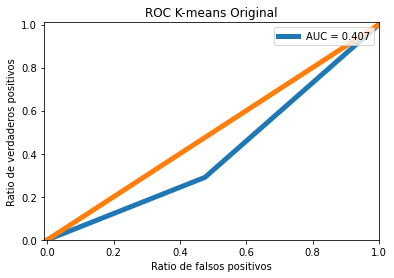

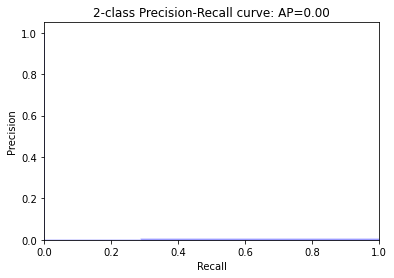

In [ ]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, y_pred_kmeans)

# Calculate Area Under the Receiver Operating Characteristic Curve 
roc_auc = roc_auc_score(yTest, y_pred_kmeans)
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(yTest, y_pred_kmeans)

# Calculate average precision 
average_precision = average_precision_score(yTest, y_pred_kmeans)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('ROC K-means Original', color='k')
    plt.ylabel('Ratio de verdaderos positivos', color='k')
    plt.xlabel('Ratio de falsos positivos', color='k')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix

print('\n')
print("Número de puntos mal etiquetados de un total de %d puntos : %d"
      % (xTest.shape[0], (yTest != y_pred_kmeans_O).sum()))

print('\n')
print('Métricas Kmeans:\n', classification_report(yTest, y_pred_kmeans))
print('\n')
print('Matriz Kmeans:\n',confusion_matrix(y_true = yTest, y_pred = y_pred_kmeans))
print('\n')

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)
print('\n')

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

#### 2. Isolation ORIGINAL



In [ ]:
clf_IF = IsolationForest(n_estimators=10, warm_start=True)
clf_IF.fit(xTrain)
clf_IF.set_params(n_estimators=20)
clf_IF.fit(xTrain)
y_pred_IF=clf_IF.predict(xTest)




In [ ]:
 #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
y_pred_IF[y_pred_IF == 1] = 0
y_pred_IF[y_pred_IF == -1] = 1

In [ ]:
acc_IF = accuracy_score(yTest, y_pred_IF)
prec_IF = precision_score(yTest, y_pred_IF, pos_label='positive',
                                           average='weighted')
rec_IF = recall_score(yTest, y_pred_IF, pos_label='positive',
                                           average='weighted')
f1_IF = f1_score(yTest, y_pred_IF, pos_label='positive',
                                           average='weighted')


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [ ]:
model_results_NOSUP_IF = pd.DataFrame([['Isolation forest', acc_IF, prec_IF, rec_IF, f1_IF]],
               columns = ['Model ', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_NOSUP = results_NOSUP.append(model_results_NOSUP_IF, ignore_index = True)

results_NOSUP

,Model,Accuracy,Precision,Recall,F1 Score
0,K means,0.524350,0.001072,0.290000,0.002136
1,Isolation forest,0.962361,0.997849,0.962361,0.979187


ROC AUC Score: 0.8563671696387746


Número de puntos mal etiquetados de un total de 56962 puntos : 2144


Métricas IF:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56862
           1       0.03      0.75      0.07       100

    accuracy                           0.96     56962
   macro avg       0.52      0.86      0.52     56962
weighted avg       1.00      0.96      0.98     56962



Matriz de confusión IF:
 [[54743  2119]
 [   25    75]]




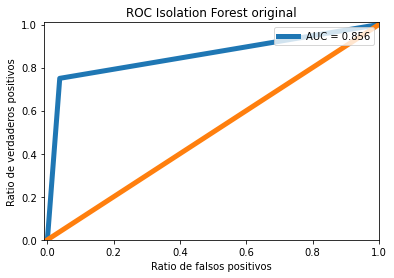

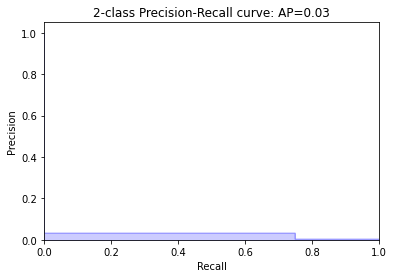

In [ ]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, y_pred_IF)

# Calculate Area Under the Receiver Operating Characteristic Curve 
roc_auc = roc_auc_score(yTest, y_pred_IF)
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(yTest, y_pred_IF)

# Calculate average precision 
average_precision = average_precision_score(yTest, y_pred_IF)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('ROC Isolation Forest original', color='k')
    plt.ylabel('Ratio de verdaderos positivos', color='k')
    plt.xlabel('Ratio de falsos positivos', color='k')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix
print('\n')
print("Número de puntos mal etiquetados de un total de %d puntos : %d"
      % (xTest.shape[0], (yTest != y_pred_IF).sum()))

print('\n')
print('Métricas IF:\n', classification_report(yTest, y_pred_IF))
print('\n')
print('Matriz de confusión IF:\n',confusion_matrix(y_true = yTest, y_pred = y_pred_IF))
print('\n')

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)
print('\n')

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)